# **Proyecto Final: Pronosticar para Transformar**
### *Gabriela Lujan | A01254904*


## ***Problemática: Desempleo y sus Efectos en el Desarrollo Económico y Social en México***

**Problemática: La Persistencia del Desempleo y su Impacto en México**

- El desempleo en México refleja exclusión económica y desigualdad social, afectando especialmente a jóvenes, mujeres y personas con menor escolaridad. El indicador seleccionado es la tasa de desocupación nacional mensual, que mide el porcentaje de personas en la PEA que buscan empleo activamente sin encontrarlo.

**Objetivos**:

- Analizar el comportamiento del desempleo en México en el tiempo.
- Identificar patrones estacionales y estructurales.
- Evaluar su contribución a los ODS 1 (Fin de la pobreza) y ODS 8 (Trabajo decente y crecimiento económico).
- Pronosticar escenarios futuros para apoyar decisiones de política pública.

**Datos**:

- Se utilizarán datos mensuales de la Encuesta Nacional de Ocupación y Empleo (ENOE) del INEGI, desde enero de 2005 hasta la fecha más reciente. La serie se centrará en la tasa de desocupación nacional y será procesada para garantizar su calidad antes del análisis estadístico.
- https://www.inegi.org.mx/app/indicadores/?tm=0&t=1010#D1010#D444557_10000080018000700110#D444603_1000008001800070#D444557_10000080018000700110


## **1. Limpieza y Preprocesamiento de Datos**

**1) Importamos los modulos necesarios**
- Importamos pandas, numpy, seaborn, matplotlib y las librerías necesarias para el ajuste de modelos de series de tiempo y análisis estadístico.

In [132]:
# Importamos módulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualizaciones
import seaborn as sns # Visualizaciones
from statsmodels.tsa.seasonal import STL # Descomposición de la serie de tiempo
from statsmodels.tsa.stattools import adfuller # Prueba ADF
from statsmodels.graphics.tsaplots import plot_acf # Graficar Funcion ACF
from statsmodels.graphics.tsaplots import plot_pacf # Graficar Funcion PACF
from statsmodels.tsa.statespace.sarimax import SARIMAX # Ajustar modelos
from statsmodels.stats.diagnostic import acorr_ljungbox # Prueba Ljung-Box


**2) Cargamos los datos**
- Cargamos los datos del archivo 'Tasa_de_Desocupacion_INEGI.csv', que contiene la tasa de desocupación mensual en México desde enero de 2005 hasta marzo de 2025.

- Visualizamos la estructura general de la serie para verificar su contenido y formato.

In [133]:
# Cargamos datos
data = pd.read_csv("/content/Tasa_de_Desocupacion_INEGI.csv", header=None)
data.head()

,0,1
0,Periodo,Porcentaje
1,2025 Mar,2.22
2,2025 Feb,2.51
3,2025 Ene,2.7
4,2024 Dic,2.43


In [134]:
# Vemos las últimas filas de nuestros datos
data.tail()

,0,1
239,2005 May,3.34
240,2005 Abr,3.44
241,2005 Mar,3.68
242,2005 Feb,3.82
243,2005 Ene P,4.06


In [135]:
# Vemos la estructura de los datos
data.shape

(244, 2)

In [136]:
# Vemos la información de la serie
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       244 non-null    object
 1   1       244 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


***Observaciones***
- El conjunto contiene dos variables:
  - **Periodo**: mes y año de la observación, con frecuencia mensual desde enero de 2005 hasta marzo de 2025.
  - **Porcentaje**: tasa de desocupación mensual, es decir, el porcentaje de personas sin empleo que buscan activamente trabajo.
- Se tienen 244 observaciones sin datos nulos.
- Los nombres de las columnas están en la primera fila, no en el encabezado.
- Ambas variables fueron importadas como tipo objeto, por lo que es necesario convertirlas a su formato adecuado.


**3) Leer datos desde la primera fila**
- Especificamos header = 0 para indicar que los nombres de las columnas se encuentran en la primera fila del archivo y deben usarse como encabezados.

In [137]:
# Leer datos desde la primera fila, usar esa fila como encabezado
data = pd.read_csv('/content/Tasa_de_Desocupacion_INEGI.csv', header = 0) # Usar primera fila como encabezado
data.head(10)

,Periodo,Porcentaje
0,2025 Mar,2.22
1,2025 Feb,2.51
2,2025 Ene,2.70
3,2024 Dic,2.43
4,2024 Nov,2.64
5,2024 Oct,2.50
6,2024 Sep,2.92
7,2024 Ago,3.04
8,2024 Jul,2.93
9,2024 Jun,2.78


In [138]:
# Revisamos nuevamente la estructura de los datos
data.shape

(243, 2)

In [139]:
# Revisamos nuevamente la informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Periodo     243 non-null    object 
 1   Porcentaje  243 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


***Observaciones***

- Ya contamos con los nombres correctos en el encabezado.
- La variable 'Porcentaje' fue reconocida correctamente como tipo decimal (float).
- Aún es necesario convertir la variable 'Periodo' a un formato de fecha (datetime) para poder trabajar con series temporales.

**4) Convertir variable 'Periodo' en tipo fecha**
- Covertimos la variable "Periodo" en propiamente un dato de tipo fecha en pandas.


1. La columna 'Periodo' contiene las fechas en formato 'Año Mes'.
 - Usamos str.split() para separar el año y el mes, accediendo a cada parte con los índices [0] (año) y [1] (mes).
 - Posteriormente, combinamos ambas partes para crear una nueva variable en formato fecha (datetime) reconocible por pandas.

In [140]:
# Extraer año y mes de la columna 'Periodo'
data['Año'] = data['Periodo'].str.split().str[0]  # Primer elemento (año)
data['Mes_Español'] = data['Periodo'].str.split().str[1]  # Segundo elemento (mes)

2. Crear diccionario para traducir meses de español a inglés
  - Pandas requiere abreviaturas de meses en inglés para convertir cadenas a fechas con pd.to_datetime.
  - Dado que las abreviaturas en la columna ‘Periodo’ están en español, creamos un diccionario que mapea cada abreviatura española a su equivalente en inglés.

In [141]:
# Creamos un diccionario para traducir las abreviaturas de los meses de español a ingles
meses_ingles = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

3. Traducir meses al inglés usando el diccionario
 - Creamos una nueva columna con los meses traducidos al inglés.
 - Aplicamos el diccionario con la función map() a la columna de meses en español, reemplazando cada abreviatura por su equivalente en inglés.

In [142]:
# Aplicamos el diccionario para traducir los meses
data['Mes_Ingles'] = data['Mes_Español'].map(meses_ingles)

4. Concatenamos las columnas de 'Año' y 'Mes_Ingles'
 - Unimos las columnas de año y mes en inglés en un solo string con formato compatible para la función pd.to_datetime.

In [143]:
# Unir año y mes en inglés en un string
data['Fecha'] = data['Año'] + ' ' + data['Mes_Ingles']

5. Convetir la variable concatenada a tipo fecha.
 - Usamos la función pd.to_datetime() de pandas para transformar la columna concatenada en un dato de tipo fecha.
 - Al no especificar el día, pandas asigna automáticamente el día 1 por defecto.

In [144]:
# Convertir a datetime (asignando el primer día del mes)
data['Fecha_Datetime'] = pd.to_datetime(data['Fecha'], format='%Y %b')

In [145]:
# Visualizar primeras filas
data.head()

,Periodo,Porcentaje,Año,Mes_Español,Mes_Ingles,Fecha,Fecha_Datetime
0,2025 Mar,2.22,2025,Mar,Mar,2025 Mar,2025-03-01
1,2025 Feb,2.51,2025,Feb,Feb,2025 Feb,2025-02-01
2,2025 Ene,2.70,2025,Ene,Jan,2025 Jan,2025-01-01
3,2024 Dic,2.43,2024,Dic,Dec,2024 Dec,2024-12-01
4,2024 Nov,2.64,2024,Nov,Nov,2024 Nov,2024-11-01


In [146]:
# Convertir a datetime (asignando el primer día del mes)
data["Porcentaje"] = pd.to_numeric(data["Porcentaje"], errors='coerce')


**5) Crear DataFrame Final**
 - Construimos el DataFrame final con las columnas necesarias: 'Periodo' (fechas mensuales) y 'Porcentaje' (tasa de desocupación).
 - Ordenamos el DataFrame de forma descendente, desde la fecha más reciente hasta la más antigua.

In [147]:
# Crear dataframe final con las columnas necesaria
data_og = pd.DataFrame({
    'Periodo': data['Fecha_Datetime'],
    'Porcentaje': data['Porcentaje']
})

# Ordenamos de fecha más antigua a más reciente
data_og = data_og.sort_values('Periodo', ascending=True).reset_index(drop=True)

# Mostrar resultado
data_og.head()

,Periodo,Porcentaje
0,2005-01-01,4.06
1,2005-02-01,3.82
2,2005-03-01,3.68
3,2005-04-01,3.44
4,2005-05-01,3.34


In [148]:
# Vemos la informacion de nuestro neuvo data frame
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Periodo     243 non-null    datetime64[ns]
 1   Porcentaje  243 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


- Listo! Ahora contamos con datos limpios y correctamente formateados para comenzar el análisis.

## **2. Análisis Exploratorio de Datos (EDA)**

**1) Análisis de datos Nulos**
- Revisamos cada columna para detectar valores nulos o inconsistentes.

In [149]:
# Verificar valores faltantes por columna
data_og.isnull().sum()

,0
Periodo,0
Porcentaje,0


***Observaciones***

- Como se confirmó previamente, no existen datos faltantes en la serie.
- Por lo tanto, no es necesario realizar ninguna imputación o tratamiento especial por valores ausentes.

**2) Estadísticas Descriptivas Generales**

- Calculamos estadísticas básicas de la variable 'Porcentaje' para comprender su distribución y comportamiento general.
- Se analizan medidas como media, mediana, desviación estándar, mínimo, máximo y percentiles, que ayudan a caracterizar la tasa de desocupación mensual.

In [150]:
# Estadísticas descriptivas de la columna 'Porcentaje'
data_og['Porcentaje'].describe()

,Porcentaje
count,243.000000
mean,4.031646
std,0.900073
min,2.220000
25%,3.360000
50%,3.880000
75%,4.785000
max,6.340000


***Observaciones***

- **count = 243**: La base de datos tiene 243 observaciones sin datos faltantes.
- **mean = 4.03%**: La tasa promedio de desocupación en México entre Enero 2005 y Marzo 2025 fue de 4.03%, una tasa moderada que indica que la mayoría de las personas que buscan empleo lo encuentran, aunque podría reflejar subempleo o personas que dejaron de buscar trabajo.
- **std = 0.9%**: La desviación estándar indica una variabilidad moderada en la tasa de desocupación a lo largo del tiempo.
- **Cuartiles**: El 50% de las tasas se encuentran alrededor del 3.88%, con el 25% de los datos por debajo de 3.36% y el otro 25% por encima de 4.79%.

- La tasa mínima registrada fue 2.22% y la máxima 6.34%, posiblemente asociada a crisis económicas o eventos extraordinarios.



**3) Estadísticas Descriptivas por Año**

- Calculamos estadísticas descriptivas de la tasa de desocupación agrupadas por año para identificar tendencias y variaciones anuales.

- Esto nos permite observar cómo cambió la desocupación promedio, su dispersión y extremos en cada año del periodo analizado.

In [151]:
# Estadísticas por año
data_og.groupby(data_og['Periodo'].dt.year)['Porcentaje'].describe()

,count,mean,std,min,25%,50%,75%,max
Periodo,,,,,,,,
2005,12.0,3.525000,0.410554,2.70,3.3700,3.635,3.7225,4.06
2006,12.0,3.564167,0.344475,2.93,3.3075,3.565,3.8850,4.05
2007,12.0,3.656667,0.324719,3.17,3.3400,3.780,3.8500,4.16
2008,12.0,3.902500,0.383693,3.28,3.5325,4.055,4.1525,4.50
2009,12.0,5.395000,0.570685,4.68,5.0600,5.220,5.9125,6.34
2010,12.0,5.308333,0.343163,4.78,4.9925,5.360,5.6225,5.83
2011,12.0,5.195000,0.406437,4.48,4.9825,5.250,5.4525,5.78
2012,12.0,4.926667,0.263485,4.43,4.7875,4.940,5.0325,5.34
2013,12.0,4.942500,0.339307,4.27,4.7600,5.040,5.1700,5.38


***Observaciones***

Aquí podemos ver la evolución anular de la tasa se desocupación (en porcentaje).

- **Período de Crisis (2009–2011)**:
  - Podemos identificar que los periodos de crisis fueron entre 2009 y 2011, donde se alcanzó un pico de tasa de desocupación máxima con 6.34%, y la media más alta de 5.39%. Esto coincide con la crisis financiera global de 2008-2009, donde la desocupación aumentó drásticamente.

- **Estabilización (2012–2019)**:
  - A partir del 2012 la tasa muestra una ligera estabilización con una media mínima histórica previa a la pandemia de 3.32%.

- **Efecto Pandemia (2020)**:
  - La tasa subió abruptamente a una media de 4.43% y un máximo de 5.49% en el año 2020. En comparación a la crisis económica del 2008, la recuperación fue rápida!. En 2021 la tasa bajó a 4.13%, y en 2022 a 3.27%.

- **Tasas mínimas (2023-2025):**
  - Se registran las tasas más bajas del periodo, con medias entre 2.47% y 2.79%, probablemente por la reactivación económica y ajustes metodológicos post pandemia.

**4) Análisis de Valores Atípicos: Boxplot**
- Aunque los valores máximos y mínimos de la tasa de desocupación parecen estar dentro de rangos esperados, es importante confirmar la presencia o ausencia de valores atípicos.

- Para ello, generamos un boxplot que visualiza la distribución y detecta posibles outliers en la serie de datos.

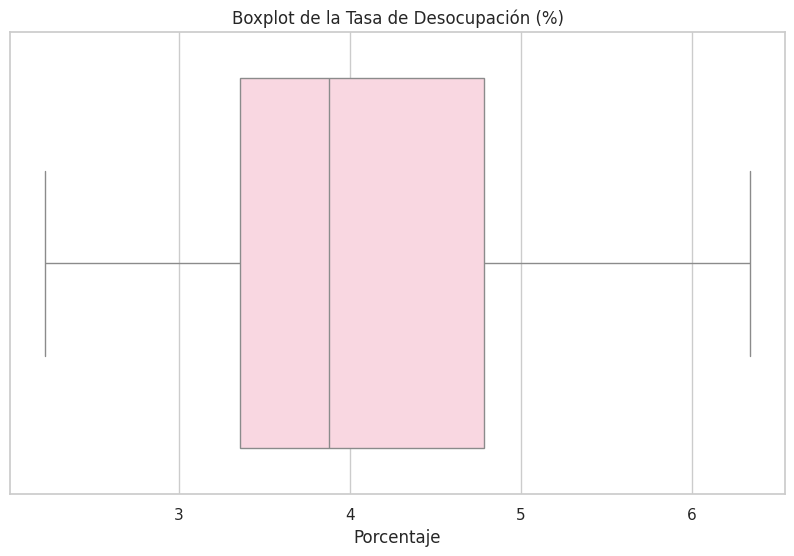

In [237]:
# Creamos un boxplot de la columna 'Porcentaje' para visualizar la distribución de la tasa de desocupación.
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_og['Porcentaje'], color='#ffd1df')
plt.title('Boxplot de la Tasa de Desocupación (%)')
plt.show()

***Observaciones***
- La media se encuentra cerca del 4%, en línea con lo visto en las estadísticas descriptivas previas.
- No se detectan valores fuera de los bigotes del boxplot, lo que indica ausencia de valores atípicos en la serie.
- Los valores máximos y mínimos corresponden a períodos de crisis económicas ya identificados, por lo que son consistentes con el contexto histórico!

**5) Visualización de la Serie de Tiempo**

- Graficamos la serie temporal de la tasa de desocupación mensual en México desde enero de 2005 hasta marzo de 2025 para observar su evolución a lo largo del tiempo.

- Destacamos visualmente los puntos donde se registraron los valores máximo y mínimo de la tasa.

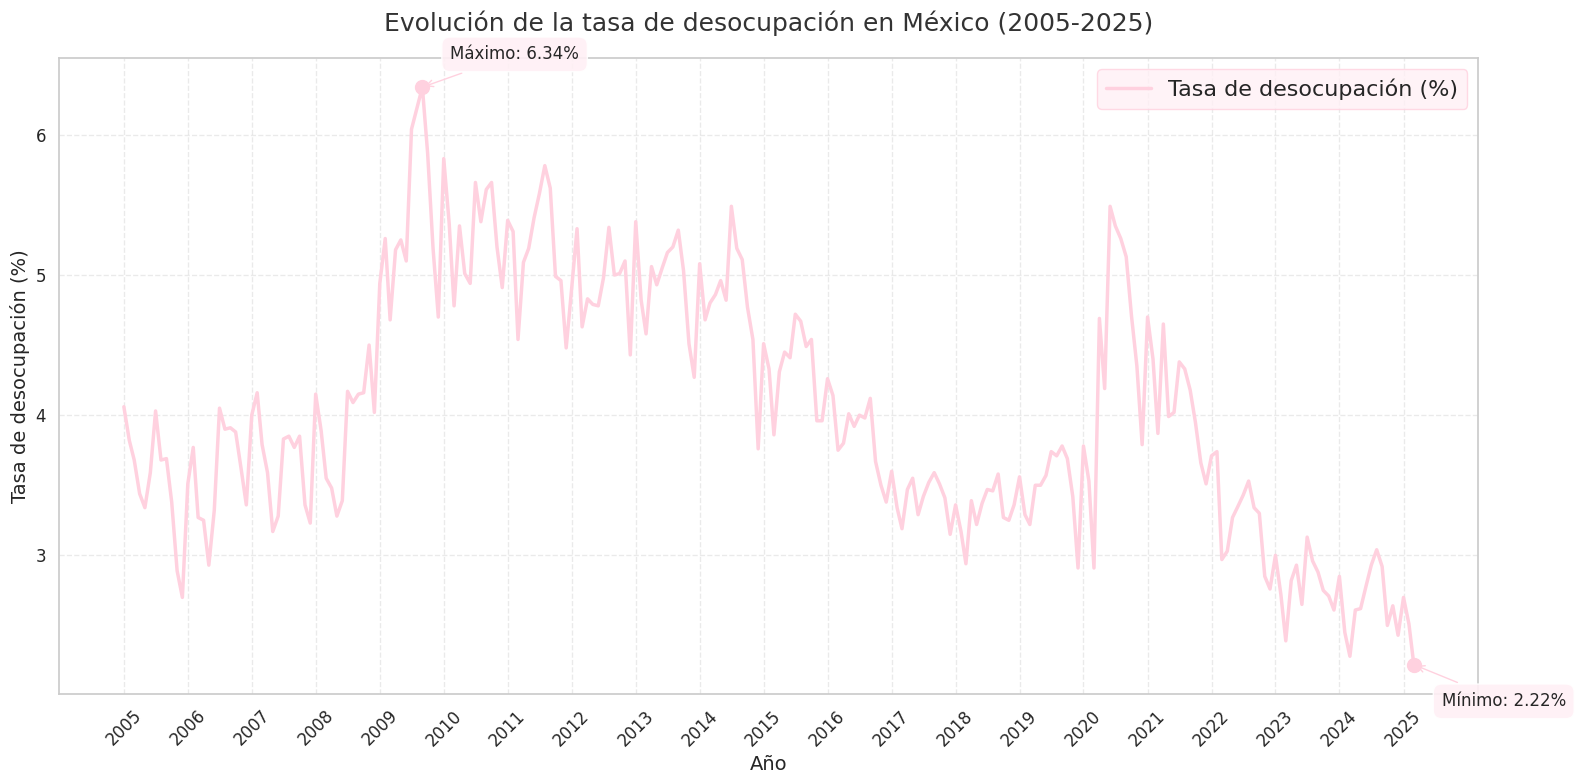

In [236]:
sns.set(style = "whitegrid", palette = "pastel")
plt.figure(figsize = (16, 8))

# Graficar la serie temporal
sns.lineplot(
    data = data_og,
    x = 'Periodo',
    y = 'Porcentaje',
    color = '#ffd1df',
    linewidth = 2.5,
    label = 'Tasa de desocupación (%)'
)

#ffb2d0 powder pink
#ffcfdc pale pink
#ffb7ce baby pink

plt.title('Evolución de la tasa de desocupación en México (2005-2025)',
          fontsize = 18, pad = 20, color = '#333333')
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Tasa de desocupación (%)', fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)  # Rotación para mejor lectura
plt.yticks(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.4)


# Encontrar el valor MÁXIMO
max_idx = data_og['Porcentaje'].idxmax()
max_date = data_og.loc[max_idx, 'Periodo']
max_value = data_og.loc[max_idx, 'Porcentaje']

# Encontrar el valor MÍNIMO
min_idx = data_og['Porcentaje'].idxmin()
min_date = data_og.loc[min_idx, 'Periodo']
min_value = data_og.loc[min_idx, 'Porcentaje']

# Anotación del punto MÁXIMO
plt.scatter(max_date, max_value, color = '#ffd1df', s = 100, zorder = 5)  # Lo marcamos con un punto
plt.annotate(
    f'Máximo: {max_value:.2f}%',
    xy = (max_date, max_value),
    xytext = (20, 20),
    textcoords = 'offset points',
    fontsize = 12,
    bbox = dict(boxstyle = 'round,pad = 0.5', fc = '#FFF0F5', alpha = 0.9),
    arrowprops = dict(arrowstyle = '->', color = '#ffd1df')
)

# Anotación del punto MÍNIMO
plt.scatter(min_date, min_value, color = '#ffd1df', s = 100, zorder = 5) # Lo marcamos con un punto
plt.annotate(
    f'Mínimo: {min_value:.2f}%',
    xy = (min_date, min_value),
    xytext = (20, -30),
    textcoords = 'offset points',
    fontsize = 12,
    bbox = dict(boxstyle = 'round,pad = 0.5', fc = '#FFF0F5', alpha = 0.9),
    arrowprops = dict(arrowstyle = '->', color = '#ffd1df')
)


# Ajustamos el eje x para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique() # Extraer los años únicos y establecerlos como ticks
plt.xticks(ticks = pd.to_datetime([f'{year}-01-01' for year in years]), labels = years)

# Leyenda
plt.legend(
    frameon = True,
    facecolor = '#FFF0F5',
    edgecolor = '#ffd1df',
    fontsize = 16
)
plt.tight_layout()

# Mostrar gráfico
plt.show()

***Observaciones***

- Las tendencias observadas en las estadísticas descriptivas se reflejan claramente en la serie de tiempo.

- Se observa un aumento abrupto en los niveles de desocupación entre 2009 y 2011 como consecuencia directa de la crisis financiera de 2008.

- Posteriormente, la tasa muestra una tendencia de estabilización hasta 2019, seguida de un aumento significativo en 2020 debido a la pandemia.

- Finalmente, en 2025 se observa el nivel más bajo de desocupación en toda la serie histórica!

## **3. Análisis de la Estructura de la Serie**

**1) Análisis Visual de la Serie de Tiempo**
- Para facilitar la identificación de patrones anuales, se añadieron líneas verticales que marcan el inicio de cada año (1ro de enero).

- Estas líneas permiten visualizar más claramente la presencia de patrones recurrentes. Dado que la serie tiene frecuencia mensual, es esperable que ciertos comportamientos se repitan año con año, lo cual indicaría estacionalidad.

- Además, la visualización ayuda a detectar tendencias generales a lo largo del tiempo, como aumentos o disminuciones en la tasa de desocupación.

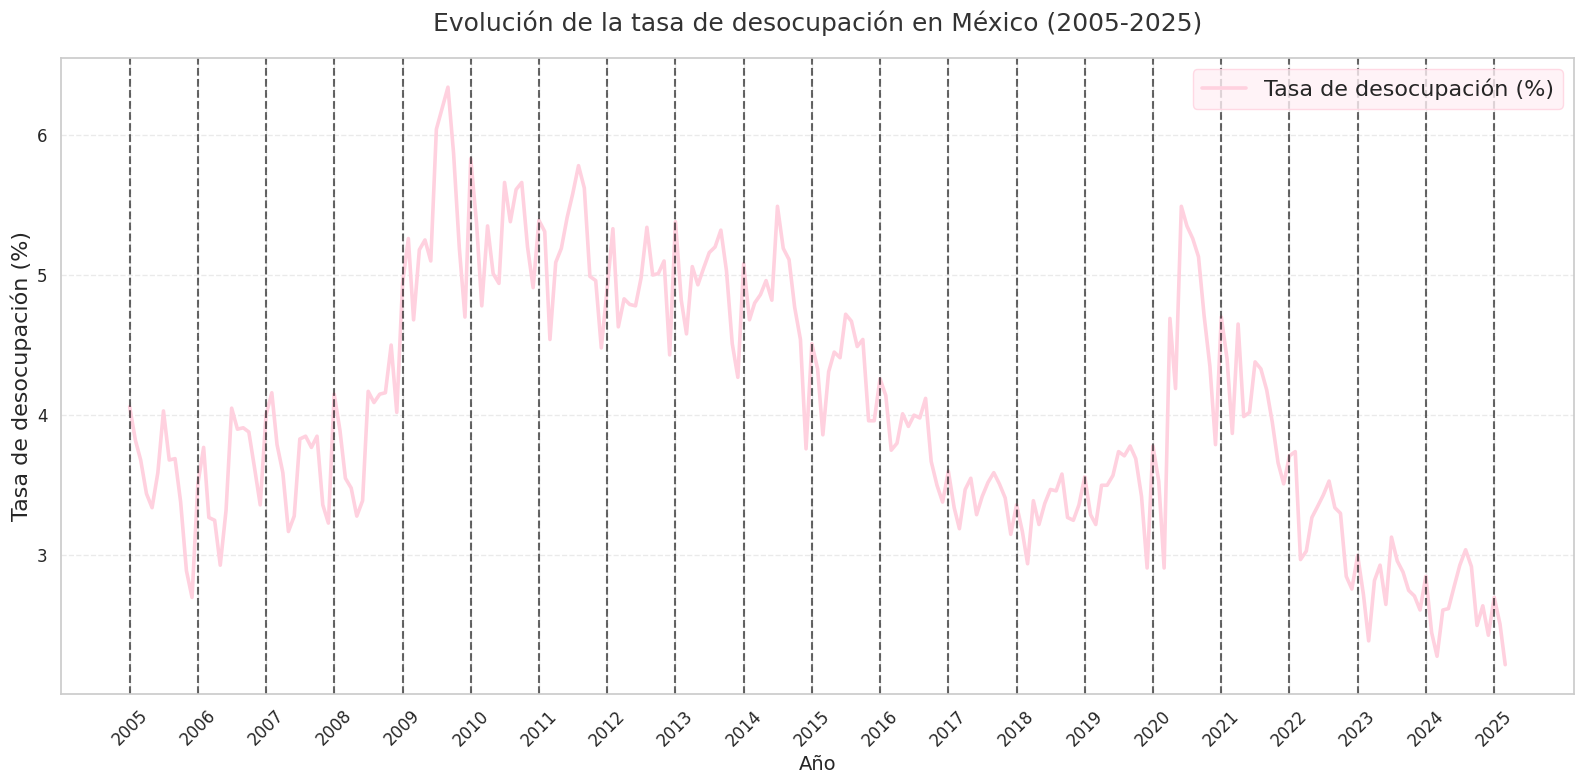

In [234]:
sns.set(style = "whitegrid", palette = "pastel")
plt.figure(figsize = (16, 8))

# Graficamos la serie temporal principal
sns.lineplot(
    data = data_og,
    x = 'Periodo',
    y = 'Porcentaje',
    color = '#ffd1df',
    linewidth = 2.6,
    label='Tasa de desocupación (%)'
)

# Añadir líneas verticales al inicio de cada año
for year in range(2005, 2026):
    plt.axvline(
        x = pd.to_datetime(f'{year}-01-01'),
        color ='black',
        linestyle ='--',
        linewidth = 1.5,
        alpha = 0.6
    )

# Personalización del gráfico
plt.title('Evolución de la tasa de desocupación en México (2005-2025)',
          fontsize = 18, pad = 20, color = '#333333')
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Tasa de desocupación (%)', fontsize = 16)

# Ajustar ticks del eje x
years = pd.to_datetime(data_og['Periodo']).dt.year.unique()
plt.xticks(
    ticks = pd.to_datetime([f'{year}-01-01' for year in years]),
    labels = years,
    rotation = 45,
    fontsize = 12
)

plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Leyenda
plt.legend(
    frameon = True,
    facecolor = '#FFF0F5',
    edgecolor = '#ffd1df',
    fontsize = 16
)

plt.tight_layout()
plt.show()

***Observaciones***

- Al analizar los intervalos entre estas líneas, se observa un patrón relativamente recurrente, donde la tasa de desocupación tiende a comenzar alta a principios de año, disminuye significativamente durante los meses siguientes, presenta algunos picos intermedios, y vuelve a aumentar ligeramente hacia el final del año. Aunque este patrón no es marcadamente fuerte, su estructura general se repite a lo largo de todo el período analizado, lo que sugiere la presencia de una componente estacional en la serie temporal."

- Además, se percibe una tendencia a largo plazo que podría asemejarse a un polinomio de tercer grado o incluso a un patrón ligeramente sinusoidal con oscilaciones suaves. En términos generales, se observa una tendencia decreciente interrumpida por eventos económicos críticos (como crisis o la pandemia).

- Dado que existe una tendencia visible en la serie con oscilaciones y no sigue un comportamiento constante como una linea recta horizonal, es probable que la serie no sea estacionaria.

- Para estudiar con mayor precisión estas componentes de tendencia, estacionalidad y ruido, procederemos a realizar una descomposición de la serie temporal.

**2) Descomposición de la Serie en sus Componentes**
- Descomponemos la serie de tiempo en sus tres componentes fundamentales:
  - Tendencia: refleja la evolución a largo plazo de la tasa de desocupación.
  - Estacionalidad: identifica patrones que se repiten con periodicidad anual (frecuencia mensual).
  - Ruido: capta las fluctuaciones aleatorias no explicadas por la tendencia ni la estacionalidad.
  
- Usamos la función STL() de statsmodels.tsa.seasonal con una frecuencia m = 12 (period = 12), ya que contamos con datos mensuales.


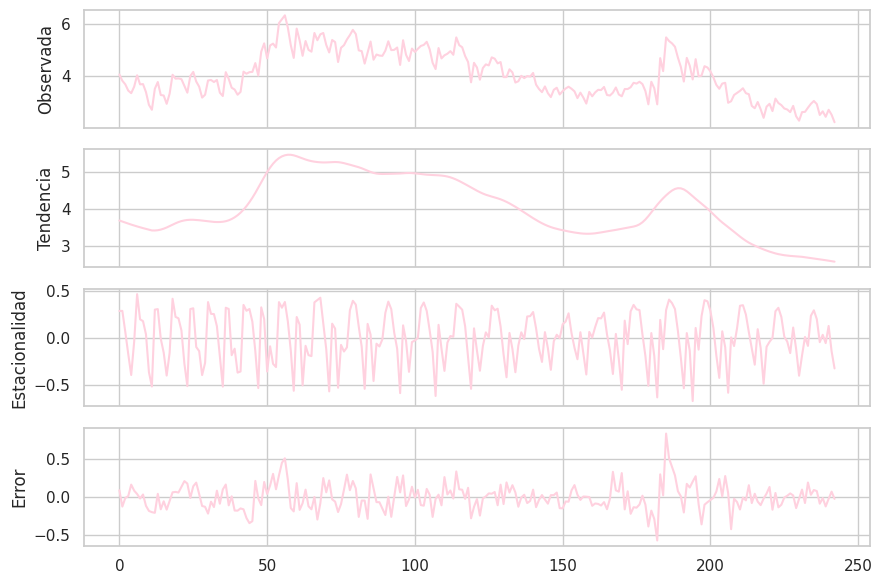

In [233]:
# Descomposición de la serie de tiempo usando STL
# Se ajusta la serie 'Porcentaje' con un periodo de 12 (mensual, un ciclo anual)
decomposition = STL(data_og["Porcentaje"], period=12).fit()

# Creamos una figura con 4 subgráficos apilados verticalmente
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.set_figwidth(9)
fig.set_figheight(6)

# Graficamos la serie original observada
ax1.plot(decomposition.observed, color="#ffd1df")
ax1.set_ylabel("Observada")

# Graficamos la componente de tendencia
ax2.plot(decomposition.trend, color="#ffd1df")
ax2.set_ylabel("Tendencia")

# Graficamos la componente estacional
ax3.plot(decomposition.seasonal, color="#ffd1df")
ax3.set_ylabel("Estacionalidad")

# Graficamos la componente de error
ax4.plot(decomposition.resid, color="#ffd1df")
ax4.set_ylabel("Error")

# Ajustamos para evitar solapamientos
plt.tight_layout()
plt.show();


***Observaciones***

- **Serie Observada**:

  La primera gráfica muestra la serie observada, es decir, la serie original con los valores mensuales de la tasa de desocupación.


- **Tendencia**:  

  La segunda gráfica presenta la componente de tendencia, estimada mediante técnicas de suavizamiento como regresiones o splines. Se observa el patrón ondulante que esperábamos, el cual refleja aumentos en años de crisis, una disminución gradual, un repunte durante la pandemia y una caída rápida en años recientes, mostrando un comportamiento general decreciente.


- **Estacionalidad**:

  La tercera gráfica representa la componente estacional, la cual muestra ciclos que, en general, tienden a repetirse cada año. Si bien es posible identificar un patrón estacional relativamente definido, este no se mantiene constante a lo largo de toda la serie. Específicamente, se observa que aproximadamente en la parte central de la gráfica, la magnitud del patrón estacional disminuye, para luego volver a incrementarse.
  
  Esta variación en la amplitud del patrón podría indicar que la especificación **aditiva** utilizada en la descomposición no es del todo adecuada. En una descomposición aditiva, se asume que la estacionalidad es independiente de la tendencia (es decir, constante a lo largo del tiempo), lo cual no parece cumplirse en este caso. En cambio, lo observado sugiere una posible relación **proporcional** entre la estacionalidad y la tendencia, lo que se asocia a un comportamiento **multiplicativo**.

  En modelos multiplicativos, la estacionalidad se amplifica o reduce en función del nivel de la tendencia (es decir, se modela como tendencia × estacionalidad, en lugar de tendencia + estacionalidad). Este tipo de comportamiento se refleja en patrones estacionales cuya amplitud varía conforme cambia la tendencia general de la serie, lo cual podemos estar observando en este caso.


- **Error**:

  La última gráfica muestra la componente residual o de error, que representa la parte de la variación que no puede explicarse ni por la tendencia ni por la estacionalidad. En teoría, esta componente debería reflejar únicamente ruido aleatorio, es decir, variaciones sin un patrón específico.

  En este caso, si bien en la mayor parte de la serie parece observarse un comportamiento aleatorio, se identifica un pico notable en un punto particular de la gráfica. Este coincide con el periodo en el que también se reduce la magnitud del patrón estacional y se observa una caída en la tendencia.

  Esta coincidencia sugiere que los residuos podrían no ser completamente aleatorios, lo cual podría estar indicando la presencia de una estructura no capturada adecuadamente por el modelo aditivo utilizado. Este efecto se volverá más evidente al momento de analizar los residuos de los modelos ajustados, ya que podríamos encontrar evidencia de que ciertos patrones no fueron correctamente modelados.



Para modelar correctamente este tipo de estructuras sería necesario utilizar una descomposición multiplicativa u otras técnicas más avanzadas. Sin embargo, dado que estos métodos no forman parte del contenido de este curso, continuaremos con la metodología aditiva, considerando cómo este tipo de comportamiento puede afectar el desempeño del modelo final.


## **4. Prueba ADF, Diferenciación, Función de Autocorrelación (ACF) y Función de Autocorrelación Parcial (PACF)**

**1) Identificar Estacionariedad: Prueba ADF**

- Como vimos anteriormente, al analizar las componentes de la serie de tiempo se observa una clara tendencia, lo que sugiere que la serie probablemente no es estacionaria, ya que la media no se mantiene constante a lo largo del tiempo.

- Para que una serie sea estacionaria, sus propiedades estadísticas deben ser invariantes en el tiempo, lo que implica que:
  - La media sea constante en cualquier tiempo.
  - La función de autocovarianza depende únicamente del retraso o diferencia entre observaciones, y no del tiempo absoluto.

- Para confirmar formalmente esta característica, aplicamos la prueba aumentada de Dickey-Fuller (ADF), la cual evalúa la presencia de una raíz unitaria en la serie. Las hipótesis del test son:
  - **Hipótesis nula (H0):** La serie tiene una raíz unitaria, es decir, no es estacionaria.
  - **Hipótesis alternativa (Ha):** La serie no tiene raíz unitaria, es decir, es estacionaria.

- Nuestro objetivo es rechazar la hipótesis nula (H0), lo que indicaría que la serie es estacionaria. Para esto, buscamos obtener p-values bajos. Desde el punto de vista teórico, si el polinomio característico del proceso tiene raíces dentro del círculo unitario, el modelo puede representarse de diferentes maneras equivalentes (por ejemplo, como un modelo autorregresivo), lo que dificulta la identificación única de los parámetros del modelo.

- Aplicamos la prueba aumentada de Dickey-Fuller (ADF) sobre la variable de interés: el porcentaje mensual de desocupación.

- La prueba se realiza utilizando la función adfuller() del paquete statsmodels.tsa.stattools. Esta función retorna una tupla con varios elementos, extraemos el primer y segundo elemento que corresponden al estadístico de prueba y el p-value.
  

In [156]:
# Usamos la funcion adfuller sobre nuestra serie de tiempo, que es el porcentaje de desocupacion por mes
result1 = adfuller(data_og["Porcentaje"])

In [157]:
print(f"Estadística de prueba: {result1[0]}") # Extraemos primer elemento = estadistico de prueba
print(f"p-value: {result1[1]}") # Extraemos segundo elemento = p-value

Estadística de prueba: -1.4517667842107684
p-value: 0.5572225663364357


***Observaciones***

- Se obtuvo un p-value = 0.5572, que es mayor al umbral usual de significancia (0.05). Esto indica que no hay evidencia estadística suficiente para rechazar la hipótesis nula (H0) de la prueba ADF.

- En consecuencia, la serie presenta una raíz unitaria, lo cual implica que no es estacionaria, que es consistente con la inspección visual previa, donde ya se había detectado una tendencia en los datos que sugiere una media no constante a lo largo del tiempo.

**2) Diferenciación**

- Dado que la prueba ADF arrojó un p-valor alto, se concluyó que la serie no es estacionaria. Para corregir esto, se aplicará una diferenciación de primer orden, que consiste en calcular la diferencia entre cada valor y su valor anterior.

- Esta transformación tiene como objetivo eliminar la tendencia, estabilizando la media de la serie a lo largo del tiempo.

- Una vez diferenciada, la nueva serie será evaluada nuevamente mediante la prueba ADF, para comprobar si el procedimiento logró hacerla estacionaria.

- Se aplica la función diff() de numpy para realizar la diferenciación de primer orden.
  - La operación se realiza sobre la variable data_og["Porcentaje"], que contiene los valores mensuales de la tasa de desocupación.
  - El parámetro n (retraso) indica el orden de la diferenciación; en este caso se establece n = 1.

In [158]:
# Diferimos los datos de nuestra serie de tiempo original: datos = data_og["Porcentaje"]
# Diferimos nuestra serie de tiempo una vez: n = 1
data_lag1 = np.diff(data_og["Porcentaje"], n = 1)

- Realizamos nuevamente la prueba de Dickey-Fuller Aumentada (ADF) con el objetivo de verificar si, tras realizar la diferenciación de primer orden, la serie de tiempo se ha vuelto estacionaria.
- Para ello, se utiliza la función adfuller() sobre la nueva serie transformada (data_lag1).


In [159]:
result2 = adfuller(data_lag1) # Realizar prueba ADF sobre los nuevos datos diferidos
print(f"p-value: {result2[1]}") # Extraemos el p-value (segundo elemento)

p-value: 0.004852625254132063


***Observaciones***

- Se obtuvo un p-value de 0.0048, el cual es menor al valor de significancia de 0.05. Esto indica que hay suficiente evidencia para rechazar la hipótesis nula (H0), por lo tanto, concluimos que la serie de tiempo se ha vuelto estacionaria tras la diferenciación de primer orden!


**3) Graficar Función de Autocorrelación Muestral (ACF)**

- La función de autocorrelación muestral nos permite analizar de forma práctica la dependencia entre observaciones en distintos momentos del tiempo, utilizando los datos disponibles.
- La función de autocorrelación muestral (ACF) al retraso h está dada por:  $r(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}$,   donde:
  - $\hat{\gamma}(h)$: Es la estimación de la covarianza en el retraso h.
  - $\hat{\gamma}(0)$: Es la varianza muestral
- Graficar esta función nos permite identificar a partir de qué retraso las observaciones dejan de estar correlacionadas significativamente. En modelos como los de media móvil, MA(q), esta gráfica sugiere directamente el orden del modelo.
- A continuación, graficamos la ACF usando la función plot_acf() de la librería statsmodels.graphics.tsaplots, aplicándola sobre la serie diferenciada data_lag1.

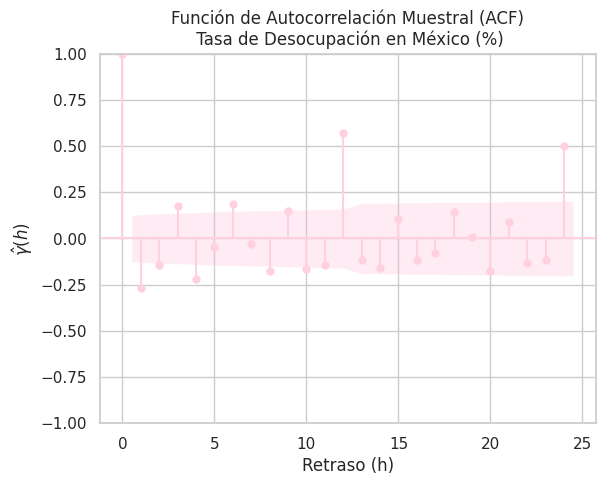

In [232]:
# Crear una figura
fig, ax = plt.subplots()

# Graficar la función de autocorrelación muestral (ACF) de la serie diferida'data_lag1'
plot_acf(
    data_lag1,
    vlines_kwargs={"color": "#ffd1df"},
    color="#ffd1df",
    ax=ax
)

# Etiquetas
plt.xlabel("Retraso (h)")                  # eje x
plt.ylabel(r"$\hat{\gamma}(h)$")           # eje y (autocorrelación estimada)
plt.title("Función de Autocorrelación Muestral (ACF)\n Tasa de Desocupación en México (%)")

for poly in ax.collections:
    poly.set_facecolor("#ffb2d0")

plt.show()


***Observaciones***

- La gráfica de autocorrelación muestral (ACF) tiene un comportamiento oscilante, donde los coeficientes suben y bajan de forma alternada.

- Este patrón indica que existe autocorrelación significativa en la serie, ya que varios coeficientes sobrepasan las bandas de confianza. Por lo tanto, descartamos que se trate de una caminata aleatoria, donde se esperaría que todos los coeficientes estén dentro de dichas bandas.

- En un modelo de media móvil MA(q), los coeficientes de autocorrelación suelen caer abruptamente dentro de las bandas de confianza después del retraso q. Dado que esto no ocurre en nuestra gráfica, descartamos también el uso de un modelo MA(q) puro.

- Aunque no se observa un patrón de decaimiento claro ni una forma sinusoidal definida en la ACF que sugiera directamente el uso de un modelo AR(p) o ARMA(p, q), el hecho de que exista dependencia entre valores pasados en la serie actual sugiere la posible presencia de un componente autorregresivo.

- Para determinar con mayor precisión la estructura del modelo, es necesario analizar también la función de autocorrelación parcial (PACF), ya que esta herramienta es clave para identificar el orden adecuado del componente


**4) Graficar Función de Autocorrelación Parcial Muestral (PACF)**

- La función de autocorrelación parcial muestral (PACF) nos permite estimar los coeficientes parciales de autocorrelación muestrales al retraso $p$, $\hat{\rho}(p)$. Estos coeficientes indican la relación directa entre el valor actual de la serie $y_t$ y su valor en el pasado $y_{t-p}$, eliminando el efecto de las observaciones intermedias.

- A diferencia de la ACF, que capta tanto relaciones directas como indirectas entre observaciones, la PACF aísla la correlación pura entre $y_t$ y $y_{t-p}$. Esto la convierte en una herramienta fundamental para determinar el orden $p$ en modelos autorregresivos AR($p$). En estos modelos, se espera que los coeficientes significativos en la PACF desaparezcan abruptamente a partir del retraso $p$, revelando el orden verdadero del proceso.

- Para esta etapa, graficamos la PACF utilizando la función plot_pacf() del módulo statsmodels.graphics.tsaplots, aplicándola a nuestros datos diferenciados (data_lag1).



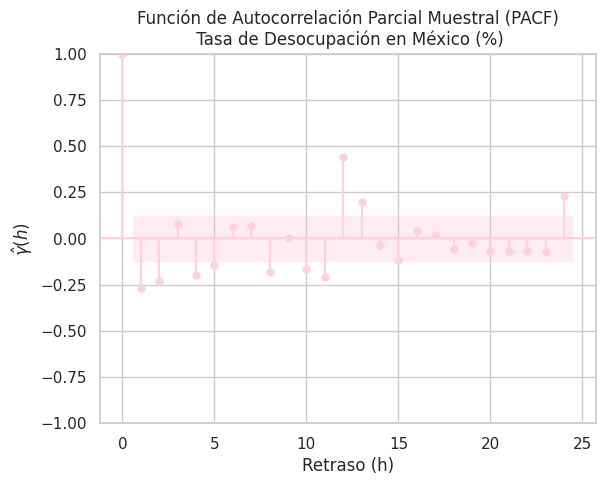

In [231]:
# Crear una figura
fig, ax = plt.subplots()

# Graficar la función de autocorrela Fción parcial muestral (PACF) de la serie diferida'data_lag1'
plot_pacf(
    data_lag1,
    vlines_kwargs={"color": "#ffd1df"},
    color="#ffd1df",
    ax=ax
)

# Etiquetas
plt.xlabel("Retraso (h)")                  # eje x
plt.ylabel(r"$\hat{\gamma}(h)$")           # eje y (autocorrelación parcial estimada)
plt.title("Función de Autocorrelación Parcial Muestral (PACF)\n Tasa de Desocupación en México (%)")

for poly in ax.collections:
    poly.set_facecolor("#ffb2d0")

plt.show();

***Observaciones***

- Similar que con la ACF, la gráfica de autocorrelación parcial muestral (PACF) muestra un comportamiento ligeramente oscilante, donde los coeficientes suben y bajan de manera alternada. Nuevamente, el comportamiento no es lo suficientemente claro como para sugerir el uso de un modelo autorregresivo AR(p), donde se esperaria la caida abrupta de los coeficientes despues del retraso p.

- En consecuencia, tanto la ACF como la PACF no muestran patrones suficientemente definidos como para sugerir de forma concluyente el uso de un modelo AR(p) o MA(q) puros. En cambio, el comportamiento observado sugiere que podría estar involucrada una combinación más compleja de componentes autoregresivos y de media móvil.

**5) Determinación de Modelos a Implementar**

- A partir del análisis conjunto de la ACF y la PACF, consideraremos dos enfoques de modelado:

  **1. Modelo ARIMA($p, d, q$):**

  Dado que ni la ACF ni la PACF presentan un patrón concluyente que indique un modelo puramente autorregresivo AR(p) o de media móvil MA(q), se propone explorar un modelo mixto ARMA(p,q) como una posible estructura subyacente de la serie. No obstante, es importante recordar que la serie de tiempo original no era estacionaria y requirió una diferenciación de primer orden para alcanzar estacionariedad. Puesto que las gráficas ACF y PACF se realizaron con la serie diferenciada, es tras esta transformación que es posible modelarla con un proceso ARMA($p, q$), por lo tanto, es natural considerar un modelo ARIMA($p, d, q$) utilizando la serie original, donde:

    - $p$: orden del componente autorregresivo (AR),
    - $d = 1$: número de diferenciaciones necesarias para lograr estacionariedad,
    - $q$: orden del componente de media móvil (MA).
  
  Este modelo permite capturar tanto la dependencia de la serie con sus valores pasados como con sus errores pasados, sobre una serie no estacionaria.



  **2. Modelo SARIMA($p, d, q$)($P, D, Q$)$_m$:**

  Además, durante el análisis de la estructura de la serie de tiempo, se identificó un componente estacional relativamente definido en la serie. Por tanto, se propone utilizar un modelo SARIMA, que extiende el ARIMA para capturar también la estructura estacional. Este modelo incorpora:

    - Una parte no estacionaria: ARIMA($p, d, q$),
    - Una parte estacional: ($P, D, Q$)$_m$, donde:

      - $P$: orden autorregresivo estacional,
      - $D$: número de diferenciaciones estacionales,
      - $Q$: orden de media móvil estacional,
      - $m$: periodicidad o longitud del ciclo estacional (por ejemplo, 12 para datos mensuales con estacionalidad anual).

   Este modelo es el más general y flexible, al considerar tanto la dinámica de corto plazo como los patrones cíclicos estacionales.

- Para identificar la combinación de órdenes óptima en los modelos ARIMA y SARIMA, se aplicará la metodología Box-Jenkins. Esta metodología consiste en ajustar múltiples especificaciones de modelos y seleccionar aquella que minimice el criterio de información de Akaike (AIC). Posteriormente, se realizará un análisis de los residuos del modelo seleccionado para verificar que cumpla con los supuestos necesarios, lo cual es esencial para validar su uso en pronósticos.



  **3. Baseline Model: Media Histórica Mensual**

  Adicionalmente, se construirá un modelo base (baseline model) mediante pronósticos ingenuos, con el objetivo de contar con un punto de referencia para evaluar el desempeño de los modelos ARIMA y SARIMA. Este modelo consistirá en calcular la media histórica mensual a partir del conjunto de entrenamiento. Por ejemplo, para pronosticar la tasa de desocupación de un mes específico en el conjunto de prueba, se utiliza el promedio de dicho mes calculado con los datos históricos del conjunto de entrenamiento.

  Opté por este enfoque en lugar de otros modelos base, como la predicción mediante el último valor observado, ya que este método permite capturar de manera simple la estacionalidad de la serie. No obstante, al tratarse únicamente de un promedio, no incorpora tendencias ni otras dinámicas temporales, por lo que se espera que modelos más sofisticados logren un mejor desempeño.



### ** EXPLICACION Metodología Box-Jenkins**

Aplicaremos la metodología Box-Jenkins para identificar el modelo más adecuado de la forma $ARIMA(p, d, q)$ y  $SARIMA(p, d, q)(P, D, Q)_m$ para nuestra serie de tiempo. Esta metodología consta de cuatro etapas fundamentales:

1. **Identificación:** Asegurar que la serie sea estacionaria (o aplicar diferenciación si no lo es) e identificar posibles patrones estacionales.
2. **Estimación de parámetros:** Probar distintas combinaciones de los órdenes $p$, $d$ y $q$ en el caso de $ARIMA$ y $p$, $d$, $q$, $P$, $D$ y $Q$, en el caso de $SARIMA$. Ajustar un modelo para cada combinación posible.
3. **Selección del mejor modelo:** Evaluar los modelos ajustados y seleccionar aquel con el menor AIC (o AICc).
4. **Análisis de residuos:** Validar si los residuos del modelo se comportan como ruido blanco, a través de dos diagnósticos:

   - **1. Diagnóstico visual:**

     - Graficar los residuos a lo largo del tiempo.
     - Evaluar normalidad mediante histograma y QQ-plot.
     - Analizar corrolelogramas de los residuos para identificar patrones de autocorrelación.
   
   - **2. Diagnóstico estadístico formal:**

     - Aplicar la prueba de Ljung–Box para evaluar la presencia de autocorrelación en los residuos.
       - H0: No autocorrelación (los residuos son ruido blanco).
       - Ha: Flexible

 Si los residuos pueden considerarse ruido blanco, el modelo es adecuado para realizar pronósticos. En caso contrario, se deben probar nuevas combinaciones de órdenes y volver al paso 2.

 - Los residuos se definen como: $residuo_t = y_t - \hat{y}_t = w_t$

  - Es decir, deben comportarse como **ruido blanco**, que se denota como: $w_t \sim WN(0, \sigma^2)$

  - El ruido blanco debe cumplir con las siguientes tres propiedades:

    1. **Independencia** (no autocorrelación).
    2. **Media cero.**
    3. **Varianza constante.**

  - Por lo tanto, estos son los criterios que evaluamos durante el análisis de residuos.

## **5. Baseline Model: Pronóstico Estacional Ingenuo**

- Comenzaremos construyendo un modelo baseline, que representa la solución más sencilla y directa al problema de pronóstico. Aunque no esperamos obtener una alta precisión con este enfoque, su principal utilidad será servir como punto de referencia para evaluar el desempeño de modelos más complejos.

- En este caso, utilizaremos un pronóstico ingenuo basado en estacionalidad, apoyado en estadísticas simples. Para ello, calcularemos la media histórica mensual: por ejemplo, para predecir la tasa de desocupación del mes de enero, tomaremos el promedio de tasa de desocupación de todos los meses de enero en el training set y lo usaremos como estimación. Este procedimiento se repetirá para cada mes del test set.

- Es importante señalar que este modelo se aplica sobre la serie original, no sobre la serie diferenciada. Esto se debe a que el promedio mensual refleja el comportamiento absoluto de la tasa de desocupación en cada mes. Si se utilizara la serie diferenciada, se estarían promediando cambios entre periodos (diferencias), no valores reales, lo cual sería dificil de interpretar y usar como pronóstico directo. Por esta razón, no será necesario reescalar los pronósticos generados.

- Este modelo se utilizará exclusivamente para evaluar el desempeño en el test set y así establecer un punto de comparación con los modelos ARIMA y SARIMA. No será empleado para realizar pronósticos futuros fuera del periodo observado.



**1) División de los datos: Generar Training y Test set**

- La serie analizada contiene observaciones mensuales desde enero de 2005 hasta marzo de 2025. A partir de esta información, se busca generar pronósticos para estimar el porcentaje de desocupación durante los seis meses siguientes: abril, mayo, junio, julio, agosto y septiembre de 2025.

- Para llevar a cabo este análisis, se dividieron los datos en dos subconjuntos:

  - **Training set:** Incluye todas las observaciones disponibles, excepto las correspondientes a los últimos seis meses.

  - **Test set:** Contiene exclusivamente las observaciones de los últimos seis meses, las cuales se utilizarán para evaluar la capacidad predictiva del modelo ajustado.


In [162]:
train = data_og[: -6].copy() # Training set: contiene todas las observaciones a excepcion de los ultimos 6 meses
test = data_og[-6 :].copy() # Test set: contiene datos de lo ultimos 6 meses

- Vemos elementos del training y test set.

In [163]:
test # Vemos elementos del test set

,Periodo,Porcentaje
237,2024-10-01,2.50
238,2024-11-01,2.64
239,2024-12-01,2.43
240,2025-01-01,2.70
241,2025-02-01,2.51
242,2025-03-01,2.22


In [164]:
train # Vemos elementos del train set

,Periodo,Porcentaje
0,2005-01-01,4.06
1,2005-02-01,3.82
2,2005-03-01,3.68
3,2005-04-01,3.44
4,2005-05-01,3.34
...,...,...
232,2024-05-01,2.62
233,2024-06-01,2.78
234,2024-07-01,2.93
235,2024-08-01,3.04


**2) Graficar Serie y Resaltar Test Set**
- Graficamos la serie de tiempo resaltando el conjunto de prueba (los últimos seis meses) mediante una banda sombreada, lo cual permite visualizar claramente el periodo sobre el que se evaluarán los pronósticos.

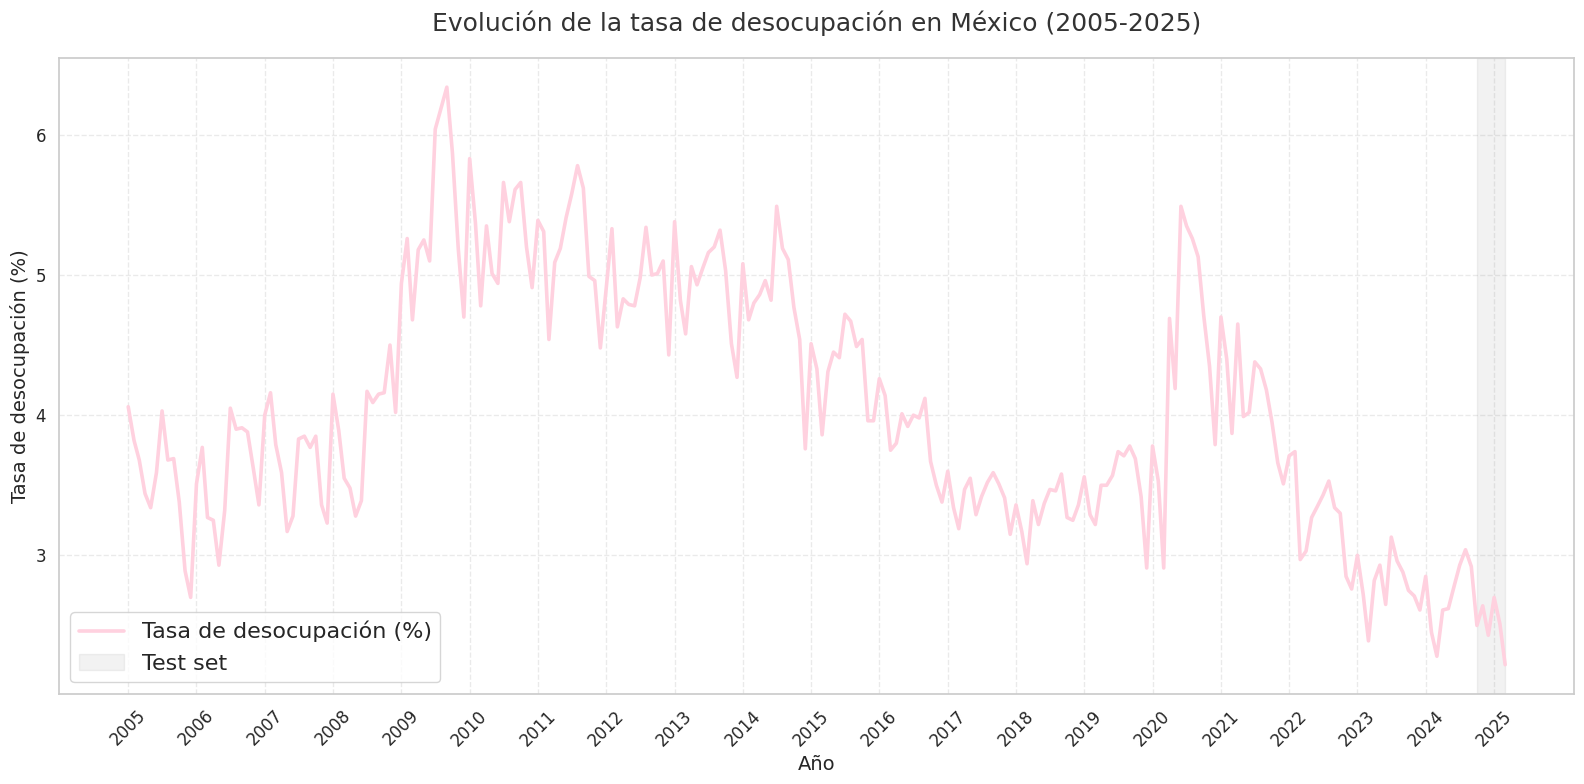

In [228]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 8))

# Graficar la serie temporal
sns.lineplot(
    data=data_og,
    x='Periodo',
    y='Porcentaje',
    color='#ffd1df',
    linewidth=2.6,
    label='Tasa de desocupación (%)'
)

# Añadir la barra que indica el test set (últimos 6 meses)
plt.axvspan(test['Periodo'].iloc[0],   # Fecha inicial del test set
            test['Periodo'].iloc[-1],  # Fecha final del test set
            color="#808080",
            alpha=0.1,
            label='Test set')

# Título y etiquetas de los ejes
plt.title('Evolución de la tasa de desocupación en México (2005-2025)',
          fontsize=18, pad=20, color='#333333')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Tasa de desocupación (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotación para mejor lectura
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Ajustamos el eje x para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique() # Extraer los años únicos y establecerlos como ticks
plt.xticks(ticks=pd.to_datetime([f'{year}-01-01' for year in years]), labels=years)

# Leyenda
plt.legend(
    frameon=True,
    fontsize=16
)
plt.tight_layout()
plt.show()

**3) Construcción Baseline Model**

- Construimos el modelo baseline asignando a cada mes del test set el promedio histórico del mismo mes, calculado a partir del training set de la siguiente forma:

1. Agrupamos los datos del train set por número de mes (1 para enero, 2 para febrero, etc.) y calculamos el promedio de la tasa de desocupación para cada uno. Estos promedios se almacenan en un diccionario que asocia cada mes con su valor promedio correspondiente.


In [195]:
# Calcular promedio mensual histórico de la tasa de desocupación en el train set y generamos diccionario
monthly_means = train.groupby(train["Periodo"].dt.month)["Porcentaje"].mean().to_dict()


2. Generamos los pronósticos asignando a cada fila del test set el promedio del mes correspondiente utilizando la función map(), basada en ese diccionario.


In [196]:
# Crear pronóstico estacional ingenuo para el test set
forecasts_baseline = test["Periodo"].dt.month.map(monthly_means) # A cada fila del test set le asignamos el promedio del mes correspondiente
forecasts_baseline

,Periodo
237,4.210000
238,3.946316
239,3.646842
240,4.228500
241,4.076000
242,3.684000


3. Finalmente, agregamos una nueva columna al test set con los valores pronosticados por este modelo baseline, la cual servirá como comparación para evaluar el desempeño de modelos más complejos como ARIMA y SARIMA.

In [197]:
# Agregar los pronósticos al test set
test.loc[:, ["forecasts_baseline"]] = forecasts_baseline
test

,Periodo,Porcentaje,forecasts_baseline
237,2024-10-01,2.50,4.210000
238,2024-11-01,2.64,3.946316
239,2024-12-01,2.43,3.646842
240,2025-01-01,2.70,4.228500
241,2025-02-01,2.51,4.076000
242,2025-03-01,2.22,3.684000


### EXPLICACION MAPE

Para evaluar el desempeño de los modelos, utilizamos el **MAPE** (Mean Absolute Percentage Error), una métrica que mide el error absoluto promedio expresado como porcentaje del valor real. El MAPE compara directamente los valores observados con los pronosticados y nos indica qué tan lejos están, en promedio, nuestras predicciones de los datos reales.

El MAPE está dado por:

- $\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n}
  \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$

Donde:
  - $y_i$: valor real de la serie de tiempo.
  - $\hat{y_i}$: valor pronosticado.
  
Podemos interpretar los resultados del MAPE en base a las siguientes reglas de dedo:
  - **Menor a 10%:** Muy buena predicción.
  - **Entre 10% y 20%:** Buena predicción.
  - **Entre 20% y 50%:** Aceptable.
  - **Más de 50%:** Mala predicción.

Esto indica que un valor bajo de MAPE indica que, en promedio, las predicciones están muy cerca de los valores reales. Por el contrario, si el MAPE supera el 50%, el modelo tiene un desempeño tan pobre que sus predicciones no aportan más valor que el azar.

**5) Calcular MAPE**
- Evaluamos la calidad de las predicciones generadas por el modelo base calculando el MAPE (Mean Absolute Percentage Error), que nos indica, en promedio, qué tan lejos están los pronósticos de los valores reales, expresado como porcentaje.

In [200]:
mape_baseline = np.abs((test["Porcentaje"] - test["forecasts_baseline"])/test["Porcentaje"]).mean()*100
print(f'MAPE Modelo Baseline:', mape_baseline)

MAPE Modelo Baseline: 58.817493466201164


***Observaciones***
- Nuestro modelo baseline obtuvo un MAPE de 58.8175%, esto indica que, como esperábamos al ser un modelo sencillo, tiene un desempeño muy malo para realizar pronósticos, básicamenta es equivalente lanzar una moneda al aire a realizar pronósticos con el modelo baseline.

**4) Visualizar Datos Reales vs Pronósticos**
- Comparamos visualmente los valores reales del test set con los pronósticos generados por el modelo baseline.

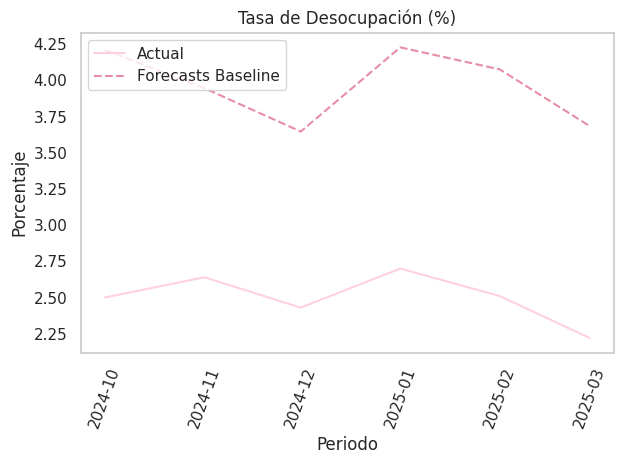

In [227]:
# Graficamos las predicciones del modelo junto con los datos reales del test set

# Línea con los valores reales de la tasa de desocupación (test set)
sns.lineplot(data=test, x="Periodo", y="Porcentaje", color="#ffd1df", label="Actual")

# Línea con los valores pronosticados por el baseline model
sns.lineplot(x=test["Periodo"], y=forecasts_baseline, color="#e78ea5", linestyle="--", label="Forecasts Baseline")

# Estética del gráfico
plt.grid()
plt.xlabel("Periodo")
plt.ylabel("Porcentaje")
plt.title("Tasa de Desocupación (%)")
plt.xticks(rotation=70)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

***Observaciones***
- Se observa que los valores de la tasa de desocupación pronosticados por el modelo baseline se desvían significativamente de los valores reales del conjunto de prueba.

- No obstante, a pesar de esta diferencia en magnitud, el patrón general que siguen los pronósticos es similar al de la serie real, lo que sugiere que el modelo logra capturar parcialmente la estructura estacional.

- Dado que el modelo se basa únicamente en promedios mensuales, no considera la tendencia ni otras fluctuaciones repentinas presentes en la serie. Por ello, modelos más sofisticados que integren estas características podrían ofrecer mejores resultados.

**5) Visualizar Train Set, Test Set y Pronósticos**

- Con el objetivo de hacer evidente la diferencia entre los valores reales y los pronósticos generados por el baseline model, se graficaremos en conjunto el train set, test set (valores reales) y los pronósticos obtenidos con el baseline model.


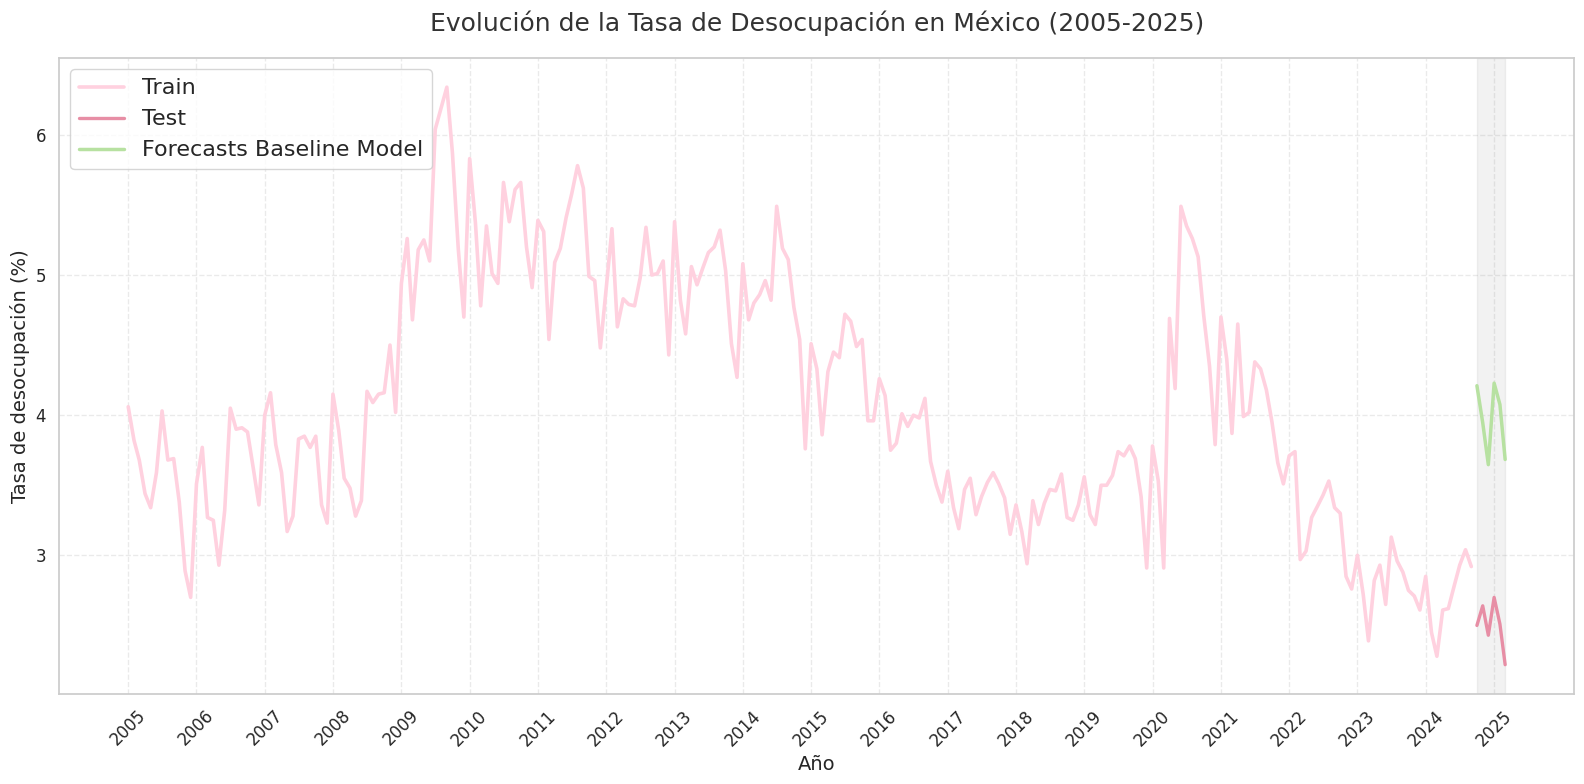

In [226]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 8))

# Graficar train set, test set, y pronosticos del baseline model
sns.lineplot(data = train, x='Periodo', y='Porcentaje', color='#ffd1df', linewidth=2.6, label='Train')
sns.lineplot(data = test, x='Periodo', y='Porcentaje', color='#e78ea5', linewidth=2.4, label='Test')
sns.lineplot(data = test, x='Periodo', y='forecasts_baseline', color='#b7e1a1', linewidth=2.5, label='Forecasts Baseline Model')

# Añadir la barra que indica el test set (últimos 6 meses)
plt.axvspan(test['Periodo'].iloc[0],   # Fecha inicial del test set
            test['Periodo'].iloc[-1],  # Fecha final del test set
            color="#808080",
            alpha=0.1)

# Título y etiquetas de los ejes
plt.title('Evolución de la Tasa de Desocupación en México (2005-2025)',
          fontsize=18, pad=20, color='#333333')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Tasa de desocupación (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotación para mejor lectura
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Ajustamos el eje x para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique() # Extraer los años únicos y establecerlos como ticks
plt.xticks(ticks=pd.to_datetime([f'{year}-01-01' for year in years]), labels=years)

# Leyenda
plt.legend(
    frameon=True,
    fontsize=16
)
plt.tight_layout()
plt.show()

***Observaciones***

- Observamos que el modelo logra seguir la estructura general de la serie, especialmente la estacionalidad. Sin embargo, no captura con precisión los valores observados en el test set.

## **6. Modelo Autorregresivo Integrado de Media Móvil: ARIMA(p, d, q)**

- Los modelos ARIMA(p, d, q) son una extensión de los modelos ARMA, ya que incorporan componentes autorregresivos (AR), de media móvil (MA) y una parte integrada (I), para tratar series no estacionarias.

  - **AR (Autorregresivo):** Dependencia de los valores pasados de la serie.
  - **I (Integrado o diferenciación):** Transformación para lograr estacionariedad en series no estacionarias.
  - **MA (Media móvil):** Dependencia de los errores pasados.

- Este modelo es adecuado cuando, tras diferenciar la serie de tiempo para volverla estacionaria, persiste una estructura clara de dependencia. Si al graficar la ACF y PACF de la serie diferenciada se observan patrones como oscilaciones, un decaimiento lento o un comportamiento similar al de una función sinusoidal, esto indica que un modelo ARIMA puede ajustarse bien a los datos.

- En esencia, un modelo ARIMA ajusta un modelo ARMA sobre una serie que ha sido diferenciada $d$ veces, donde $d$ representa el número de diferenciaciones requeridas para alcanzar la estacionariedad.

- Para identificar el parámetro $d$, se comienza diferenciando la serie y observando cuántas veces es necesario hacerlo para volverla estacionaria. En algunos casos, si la tendencia parece seguir un polinomio de grado $n$, ese grado puede orientar la elección de $d$.

- Una vez obtenida la serie diferenciada, denotada como $Y'_t$, se asume que ésta sigue un proceso ARMA($p, q$) descrito por la siguiente ecuación:

  - $Y'_t = \rho_1 Y'_{t-1} + \cdots + \rho_p Y'_{t-p} + w_t + \theta_1 w_{t-1} + \cdots + \theta_q w_{t-q}$
  - donde $w_t$ es un ruido blanco: $w_t$ ~ $WN(0, \sigma^2)$.

- En notación con el operador retraso $B$, el modelo se expresa como:

  - $\phi(B) Y'_t = \theta(B) w_t$

- con:

  - $\phi(B) = 1 - \rho_1 B - \cdots - \rho_p B^p \quad \text{(Polinomio característico AR(p))}$
  - $\theta(B) = 1 + \theta_1 B + \cdots + \theta_q B^q \quad \text{(Polinomio característico MA(q))}$


### **1. Metodología Box-Jenkins**

- Aplicaremos la metodología Box-Jenkins para identificar el modelo más adecuado de la forma $ARIMA(p, d, q)$ para nuestra serie de tiempo.

#### **1. Identificación**

- En esta etapa evaluamos si la serie es estacionaria y si presenta estacionalidad.

- **Estacionariedad:**

 - Para verificar si la serie es estacionaria, aplicamos la prueba aumentada de Dickey-Fuller (ADF).
 - Tal como se mostró en la sección 4, el p-value obtenido fue mayor a 0.05. Por lo tanto, no se rechazó la hipótesis nula de presencia de raíz unitaria, concluyendo que la serie no es estacionaria.
 - Esta verificación es fundamental para determinar el número de diferenciaciones necesarias para lograr estacionariedad, lo cual define el parámetro $d$ del modelo ARIMA($p, d, q$).
 - Tras aplicar una diferenciación de primer orden, se logró alcanzar estacionariedad en la serie. En consecuencia, fijamos $d = 1$ para el modelo.

- **Estacionalidad:**

 - Como también se evidenció en la sección 3, la serie presenta un patrón estacional recurrente, que se observa por la presencia de picos regulares al inicio de cada año.
 - Este comportamiento sugiere la posibilidad de incorporar componentes estacionales adicionales, como el ajuste de un modelo $SARIMA$ que se hará más adelante.


#### **2. Enlistar valores de p y q y ajustar modelos $ARIMA(p, 1, q)$ para cada posible combinación.**

**1) Función para ajustar distintos modelos**

- Dado que nuestra serie requiere una diferenciación de primer orden, el modelo a utilizar tiene la forma $ARIMA(p, 1, q)$.

- Para determinar los valores óptimos de los parámetros $p$ y $q$, empleamos la siguiente función, desarrollada en clase, que ajusta distintos modelos ARIMA y evalúa su desempeño mediante el criterio de información de Akaike (AIC). Aunque el AIC no mide la calidad absoluta de un modelo, sí permite comparar modelos entre sí, de forma que  a menor AIC, mejor es el modelo dentro del conjunto evaluado*.

- Esta función hace lo siguiente:

  1. Recibe como entrada:
   - La serie de tiempo.
   - Listas de posibles valores para los parámetros p (autoregresivo) y q (media móvil).
   - Un valor fijo de d (orden de diferenciación), previamente determinado para asegurar estacionariedad.
  2.  Se construye una malla con todas las combinaciones posibles de los valores de $p$ y $q$ mediante np.meshgrid(). Luego, esta malla se aplana con .ravel() y se reestructura en una matriz de pares ordenados $(p, q)$.
  3. Para cada combinación $(p, d, q)$ se ajusta un modelo $ARIMA(p, d, q)$ utilizando la función SARIMAX().
  4. Calcula el AIC de cada modelo ajustado.
  5. La función devuelve un DataFrame con todas las combinaciones evaluadas y sus respectivos AICs en orden ascendente, lo cual permite seleccionar el mejor modelo según este criterio.

In [ ]:
# Sabemos que buscamos ajustar un ARIMA(p, 1, q), el modelo requiere una diferenciación de orden 1, por eso d = 1

def optimize_arima(data, p, d, q):
    '''
    Ajusta de forma iterativa modelos ARIMA(p, d, q) sobre una serie de tiempo
    y devuelve los valores del criterio AIC para cada combinación (p, q).

    Entrada:
    - data: Serie de tiempo a modelar (pd.DataFrame).
    - p: Conjunto de valores a probar para el parámetro AR (autoregresivo) (int).
    - d: Orden de diferenciación (int)
    - q: Conjunto de valores a probar para el parámetro MA (media móvil) (int).

    Salida
    - results: Data frame con todas las combinaciones (p,d,q) y el AIC correspondiente (pd.DataFrame).
    '''

    # Generamos una malla con todas las combinaciones posibles de p y q
    # np.meshgrid crea dos matrices con todas las combinaciones p x q
    x, y = np.meshgrid(p, q)

    # Convertimos esas combinaciones en una matriz de pares ordenados (p, q)
    orders = np.c_[x.ravel(), y.ravel()]

    # Inicializamos una lista vacía para guardar los resultados
    results = []

    # Iteramos sobre cada combinación de parámetros (p, q)
    for i in range(len(orders)):
        order_tuple = (orders[i, 0], d, orders[i, 1])  # Combinación completa (p, d, q)

        # Ajustamos el modelo SARIMAX con los parámetros seleccionados
        model = SARIMAX(data, order = order_tuple).fit(maxiter=1000)

        # Calculamos el AIC del modelo
        aic = model.aic

        # Guardamos la tupla (parámetros, AIC)
        results.append((order_tuple, aic))

    # Convertimos la lista de resultados en un DataFrame y lo ordenamos por AIC
    results = pd.DataFrame(results, columns=["Order", "AIC"]).sort_values(by="AIC")

    return results  # Devolvemos el data frame con los resultados


**2) Definir Parámetros**

- Establecemos los valores que probaremos para los parámetros $p$, $d$ y $q$ del modelo $ARIMA(p, d, q)$.
- Elegimos valores entre 0 y 4 para $p$ y $q$, lo que permite considerar una amplia gama de estructuras: desde ruido blanco (cuando $p = q = 0$), hasta procesos puramente autorregresivos, de media móvil o mixtos.
- El parámetro $d$ se fija en 1, ya que previamente identificamos que una sola diferenciación es suficiente para lograr la estacionariedad de la serie.



In [ ]:
# Definir parámetros
p = np.arange(0,5,1)  # Probaremos valores de p desde 0 hasta 4
q = np.arange(0,5,1)  # Probaremos valores de q desde 0 hasta 4
d = 1                 # Fijar el parámetro d, ya que la serie fue diferenciada una sola vez

In [ ]:
# Llamamos nuestra funcion
results_arima = optimize_arima(train["Porcentaje"], p, d, q)
results_arima

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Order,AIC
18,"(3, 1, 3)",162.385371
14,"(4, 1, 2)",163.088306
24,"(4, 1, 4)",165.454203
17,"(2, 1, 3)",166.101564
22,"(2, 1, 4)",166.538665
23,"(3, 1, 4)",167.485441
19,"(4, 1, 3)",167.917501
20,"(0, 1, 4)",192.467138
9,"(4, 1, 1)",192.938092
4,"(4, 1, 0)",193.938348


#### **3. Seleccionar el mejor modelo**

- Según los resultados obtenidos al comparar los valores de AIC, el modelo más adecuado es un **ARIMA(3, 1, 3)**, ya que presenta el menor AIC.

Esto significa que:

- **p = 3:** La parte autorregresiva (AR) es de orden 3, es decir, el modelo depende de los tres valores anteriores de la serie.
- **d = 1:** La parte integrada (I) indica que se aplicó una sola diferenciación para hacer la serie estacionaria.
- **q = 3:** La parte de media móvil (MA) también es de orden 3, lo que implica que el modelo utiliza los errores de predicción de los tres periodos anteriores.

**1) Ajustamos un modelo ARIMA(3, 1, 3)**
- Procedemos a ajustar y entrenar el modelo ARIMA(3, 1, 3) utilizando la función SARIMAX().
- Para ello, utilizamos los datos originales de la serie, ya que el modelo internamente incorpora la diferenciación mediante el parámetro $d = 1$.

In [ ]:
model_arima = SARIMAX(train["Porcentaje"], order = (3,1,3)).fit(max_iter=1000)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- Hacemos un summary() del modelo ajustado para obtener los parámetros estimados.



In [ ]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Porcentaje   No. Observations:                  237
Model:               SARIMAX(3, 1, 3)   Log Likelihood                 -74.499
Date:                Sat, 07 Jun 2025   AIC                            162.999
Time:                        19:47:49   BIC                            187.246
Sample:                             0   HQIC                           172.773
                                - 237                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4877      0.127     -3.830      0.000      -0.737      -0.238
ar.L2         -0.4819      0.126     -3.837      0.000      -0.728      -0.236
ar.L3          0.5142      0.126      4.075      0.000       0.267       0.762
ma.L1          0.2581      0.110      2.341      0.019       0.042       0.474
ma.L2          0.2148      0.107      2.000      0.046       0.004       0.425
ma.L3         -0.7545      0.113     -6.670      0.000      -0.976      -0.533
sigma2         0.1074      0.013      8.095      0.000       0.081       0.133
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                99.06
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.81
Prob(H) (two-sided):                  0.99   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***Observaciones***

- Al ajustar un modelo ARIMA(3, 1, 3), esperamos obtener tres coeficientes para la parte autorregresiva (AR) y tres para la parte de media móvil (MA). El summary() del modelo nos proporciona estos parámetros estimados, y a partir de ellos podemos escribir explícitamente la forma funcional del modelo como:


$$
Y_t = -0.4877 Y_{t-1} - 0.4819 Y_{t-2} + 0.5142 Y_{t-3} + w_t + 0.2581 w_{t-1} + 0.2148 w_{t-2} - 0.7545 w_{t-3}
$$

- donde: $w_t$ ~ $WN(0, 0.1074)$

#### **4. Evaluación del Modelo: Análisis de Residuos**

- Realizamos un análisis de los residuos del modelo para verificar si se comportan como ruido blanco, lo que implicaría que el modelo ha capturado toda la estructura sistemática de la serie y que lo que queda es meramente aleatorio. Esto es crucial para poder confiar en los pronósticos generados.

- Para que los residuos puedan considerarse ruido blanco, deben cumplir con las siguientes tres condiciones:

  1. Ser independientes entre sí.
  2. Tener media cero.
  3. Presentar varianza constante a lo largo del tiempo.

- Para evaluar estas condiciones, llevamos a cabo dos tipos de diagnóstico:

  1. **Diagnóstico visual**: mediante distintas gráficas de los residuos (serie temporal, histograma, Q-Q plot y correlogramas) evaluamos de forma inferencial si los residuos cumplen las condiciones mencionadas.
  2. **Diagnóstico formal**: aplicamos la **prueba de Ljung-Box**, que permite verificar estadísticamente si los residuos presentan autocorrelación significativa. Si el resultado de esta prueba no es significativo, podremos concluir que los residuos no están autocorrelacionados y, por tanto, se comportan como ruido blanco.

**1) Diagnostico Visual:**
- Utilizamos la función plot_diagnostics() aplicada al modelo ARIMA(3, 1, 3) ajustado, con el objetivo de verificar visualmente si los residuos cumplen las condiciones para ser considerados ruido blanco.

- Esta función genera automáticamente cuatro gráficos:

  1. **Residuos estandarizados a lo largo del tiempo:** para observar si hay varianza constante y ausencia de patrones (varianza constante).
  2. **Histograma:** para evaluar si los residuos se distribuyen normalmente (media 0).
  3. **Q-Q Plot:** compara los cuantiles de los residuos con los de una distribución normal, ayudando a verificar normalidad (media 0).
  4. **Correlograma (ACF):** para detectar si existe autocorrelación significativa entre los residuos (independencia).

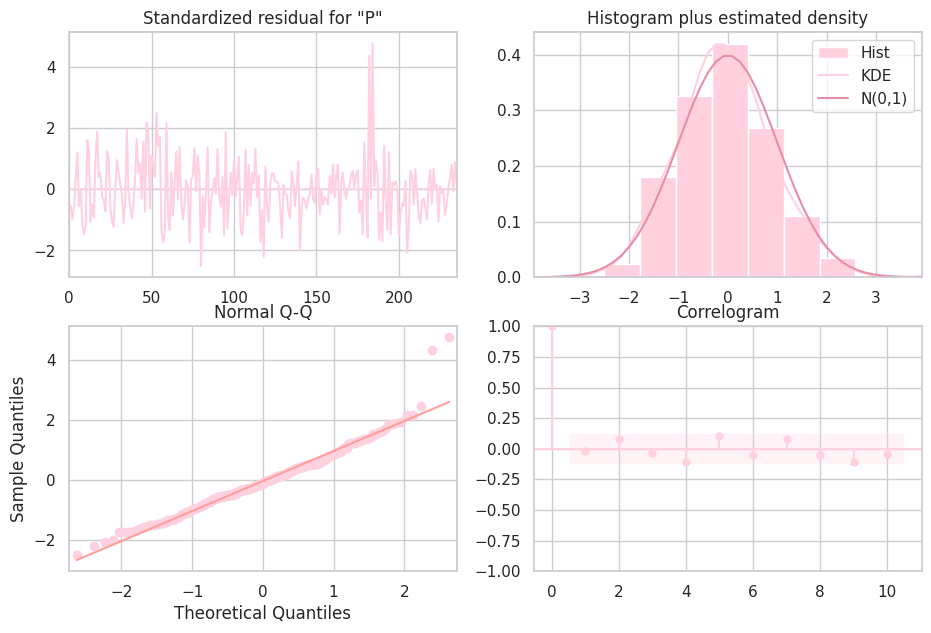

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Activamos un estilo rosado general
sns.set_style("whitegrid")
plt.rcParams.update({"axes.prop_cycle": plt.cycler(color=["#ffd1df", "#ffd1df", "#e78ea5", "#ffd1df"])})

# Luego generas las gráficas
model_arima.plot_diagnostics(figsize=(11, 7))
plt.show()


***Observaciones***

- **Gráfica 1: Residuos estandarizados (verificar varianza constante)**

  - En esta gráfica se muestran los residuos estandarizados a lo largo del tiempo. Idealmente, deberíamos observar un comportamiento aleatorio, sin patrones visibles. Esto indicaría que el modelo ha capturado adecuadamente la estructura de la serie y que lo que resta es únicamente la aleatoriedad inherente.

  - Sin embargo, aunque en general los residuos parecen aleatorios, se observa un aumento notable en un periodo específico. Este comportamiento puede indicar que la varianza no es constante o que existe algún componente no capturado por el modelo que introduce variabilidad adicional.

  - Este hallazgo coincide con lo mencionado en la Sección 3, donde se observó que la serie original presentaba un patrón estacional relativamente definido, pero con un periodo en el que dicho patrón disminuía. Este cambio estructural se vuelve más evidente en los residuos del modelo. Además, como ya se mencionó, esto podría ser indicio de que una descomposición multiplicativa sería más adecuada que una aditiva, ya que la variabilidad parece estar relacionada con el nivel de la serie.

- **Gráfica 2: Histograma de los residuos (verificar media cero)**

  - El histograma permite visualizar la distribución de los residuos. En este caso, la forma del histograma se asemeja a la de una distribución normal.
  - Esto sugiere que los residuos presentan una media cercana a cero, lo cual es deseable en un buen modelo de series de tiempo. Aunque no se busca comprobar una normalidad exacta, bajo este supuesto, podemos asumir que su media es cero.

- **Gráfica 3: Q-Q Plot (verificar media cero)**

  - Esta gráfica compara los cuantiles observados de los residuos con los cuantiles teóricos de una distribución normal.
  - Como los puntos se alinean bastante bien sobre la línea diagonal, podemos concluir que los residuos siguen una distribución aproximadamente normal. Esto refuerza la hipótesis de que tienen media cero.

- **Gráfica 4: Correlograma ACF de los residuos (verificar autocorrelación)**

  - En el correlograma, buscamos si existen autocorrelaciones significativas entre los residuos.
  - Como en los análisis ACF anteriores, si los puntos caen dentro de las bandas de confianza, entonces las autocorrelaciones no son estadísticamente significativas.
  - En este caso, los residuos parecen no presentar autocorrelación significativa, por lo que podemos considerar que son independientes.


- **Conclusión**

  - A pesar de que la primer gráfica parece indicar que los residuos no tienen una varianza constante, las demás gráficas reflejan características de un ruido blanco. Por lo tanto, concluimos que en principio, los residuos del modelo cumplen con los supuestos básicos de aleatoriedad e independencia.

  - No obstante, para confirmarlo formalmente, realizaremos una prueba estadística de Ljung-Box, que nos permitirá evaluar si existe autocorrelación en los residuos. De haberla, entonces no se cumpliría el supuesto de independencia, y podría indicar problemas en la especificación del modelo.

**2) Diagnóstico 2: Prueba de Ljung-Box**

- Para complementar el diagnóstico visual, realizamos una prueba estadística formal, la prueba de Ljung-Box, con el objetivo de verificar si los residuos del modelo pueden considerarse independientes. Esta prueba es utilizada para detectar la presencia de autocorrelación en una serie temporal.

- Al ser una prueda de tipo portmanteau, la hipótesis nula $H_0$ está bien definida, mientras que la hipótesis alternativa $H_a$ es más general o flexible. Esto no representa un problema, ya que nuestro interés principal está en verificar si podemos aceptar o rechazar $H_0$.

- *Hipótesis de la prueba:*

  - $H_0$: No hay autocorrelación → los residuos son independientes (ruido blanco).
  - $H_a$: Flexible.

- El estadístico de prueba $Q_m$ evalúa la autocorrelación muestral para un determinado retraso $m$.

  - Se realiza la prueba para diferentes valores de $m$, por ejemplo $h = 1, 2, 3, \ldots$, y se obtiene un p-value asociado a cada retraso.
  - Estos p-values se pueden graficar para observar visualmente en qué puntos se rechaza o no la hipótesis nula.

- *Interpretación de los p-valores:*

  - p-values grandes (mayores a 0.05): No se rechaza $H_0$ → los residuos son independientes.
  - p-values pequeños (menores a 0.05): Se rechaza $H_0$ → los residuos presentan autocorrelación.

- A diferencia de otras pruebas como la ADF, en la prueba de Ljung-Box buscamos p-valores grandes, ya que queremos aceptar la hipótesis nula.



- Para aplicar la prueba, primero extraemos los residuos del modelo ajustado mediante el atributo .resid.

In [ ]:
# Obtenemos los residuos del modelo ARIMA(3, 1, 3) ajustado
residuals_arima = model_arima.resid

- Aplicamos la función acorr_ljungbox() del módulo statsmodels.stats.diagnostic, la cual nos devuelve los p-valores para distintos retrasos.

In [ ]:
# Aplicamos la prueba de Ljung-Box sobre los residuos del modelo ARIMA
# np.arange(1, 11, 1) genera los retrasos (h) del 1 al 10
ljungbox_res_arima = acorr_ljungbox(residuals_arima, lags=np.arange(1, 11, 1))

# Guardamos los p-values en una variable para mayor claridad
pvalues = ljungbox_res_arima["lb_pvalue"]

- Finalmente, graficamos estos p-valores junto con una línea de referencia en 0.05. Si la mayoría de los puntos quedan por encima de esta línea, tenemos evidencia para aceptar $H_0$, y por tanto considerar que los residuos son independientes.

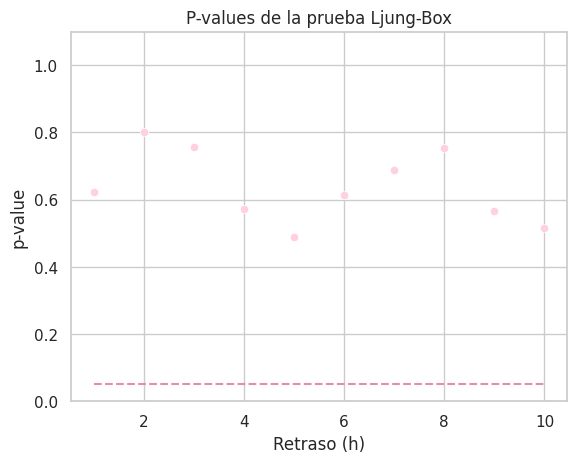

In [241]:
# Visualizamos los p-values para cada retraso con un diagrama de dispersión
# Graficamos los p-values obtenidos en función del retraso
sns.scatterplot(x=np.arange(1, 11, 1), y=pvalues, color="#ffd1df")

# Añadimos una línea horizontal en 0.05 como referencia de significancia
# Si los puntos están por encima de esta línea, no rechazamos H0, y los residuos son independientes
plt.hlines(y=0.05, xmin=1, xmax=10, color="#e78ea5", linestyles="--")

# Ajustamos los límites del eje y
plt.ylim(0, 1.1)

# Etiquetas y título
plt.xlabel("Retraso (h)")
plt.ylabel("p-value")
plt.title("P-values de la prueba Ljung-Box")
plt.show()


***Observaciones***
- Todos los puntos en la gráfica, que representan los p-values para distintos retrasos, se encuentran por encima de la línea de referencia en 0.05.
- Esto indica que en todos los casos p-value > 0.05, por lo tanto, no se rechaza la hipótesis nula de la prueba Ljung-Box.
- En consecuencia, no hay evidencia de autocorrelación significativa entre los residuos.
- Podemos concluir que los residuos del modelo se comportan como ruido blanco: son independientes, tienen media cero y, por ahora, aceptamos que presentan una varianza constante (o al menos haremos como que sí!).

### **2. Realizar Pronósticos**

- Dado que contamos con evidencia de que los residuos del modelo se comportan como ruido blanco, podemos decir que el modelo ARIMA(3, 1, 3) es adecuado para hacer predicciones confiables.

- Comenzaremos realizando pronósticos para los valores del test set, como lo hicimos en el baseline model. El test set contiene los datos de la tasa de desocupación correspondientes a los últimos seis meses observados en la serie. Esto nos permitirá evaluar el desempeño del modelo al comparar las predicciones con los valores reales.

- Posteriormente, utilizaremos el modelo para proyectar la tasa de desocupación durante los próximos seis meses: abril, mayo, junio, julio, agosto y septiembre de 2025. Estos meses no han sido observados por la serie original, por lo tanto, se tratará de un pronóstico a futuro.

- Es importante destacar que, dado que el modelo ARIMA incorpora la diferenciación dentro del ajuste, este se realiza directamente sobre los datos originales. Además, el modelo se encarga automáticamente de revertir la diferenciación en los pronósticos, por lo que no es necesario reescalar o transformar los valores pronosticados para obtenerlos en su escala original.


#### **1. Pronosticar Elementos del Test Set**

**1) Pronosticar elementos del test set**
- Para evaluar el desempeño del modelo ARIMA(3, 1, 3), pronosticamos los siguientes 6 meses y comparamos con los datos reales del test set.

- Usamos la función .predict() indicando el rango de fechas correspondiente al periodo a pronosticar.

- Este paso permite validar si el modelo generaliza bien a datos no vistos antes de usarlo para predicciones futuras.

In [ ]:
# Revisamos los elementos del test set para definir los índices de los meses a predecir
test

,Periodo,Porcentaje,Mes,Pronostico_Estacional
237,2024-10-01,2.50,10,4.210000
238,2024-11-01,2.64,11,3.946316
239,2024-12-01,2.43,12,3.646842
240,2025-01-01,2.70,1,4.228500
241,2025-02-01,2.51,2,4.076000
242,2025-03-01,2.22,3,3.684000


In [262]:
# Utilizamos función .preditc() y especificamos los indices de los meses a predecir
forecasts_arima = model_arima.get_forecast(237, 242)
forecasts_arima

- Agregamos una nueva columna al test set con los valores pronosticados por este modelo ARIMA(3, 1, 3).

In [204]:
# Agregar los pronósticos al test set
test.loc[:, ["forecasts_arima"]] = forecasts_arima
test

,Periodo,Porcentaje,forecasts_baseline,forecasts_arima
237,2024-10-01,2.50,4.210000,3.090661
238,2024-11-01,2.64,3.946316,2.913771
239,2024-12-01,2.43,3.646842,2.818119
240,2025-01-01,2.70,4.228500,3.037766
241,2025-02-01,2.51,4.076000,2.885783
242,2025-03-01,2.22,3.684000,2.804868


**2) Calcular MAPE**
- Calculamos el MAPE para evaluar el desempeño de nuestro modelo ARIMA(3, 1, 3).



In [205]:
# Construimos el mape
mape_arima= np.abs((test["Porcentaje"] - forecasts_arima)/test["Porcentaje"]).mean()*100
print(f'MAPE Modelo ARIMA(3, 1, 3):', mape_arima)

MAPE Modelo ARIMA(3, 1, 3): 17.29920841808783


***Observaciones***
- El modelo ARIMA(3, 1, 3) obtuvo un MAPE de 17.3%, lo cual indica que sus predicciones son consideradas buenas. Este nivel de error sugiere que el modelo logra capturar adecuadamente la dinámica de la serie y proporciona estimaciones útiles para el pronóstico.

**3) Visualizar Datos Reales vs Pronósticos**
- Comparamos visualmente los valores reales del test set con los pronósticos generados por el modelo.

- Esta gráfica permite identificar qué tan bien el modelo captura la tendencia y estacionalidad de los datos fuera de la muestra.

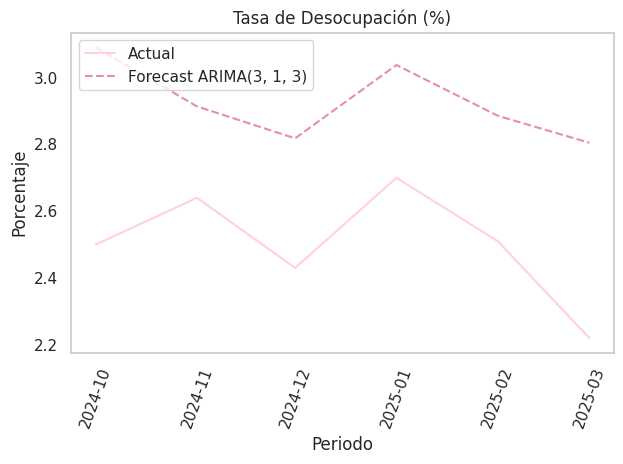

In [242]:
# Graficamos las predicciones del modelo junto con los datos reales del test set

# Línea con los valores reales de la tasa de desocupación (test set)
sns.lineplot(data=test, x="Periodo", y="Porcentaje", color="#ffd1df", label="Actual")

# Línea con los valores pronosticados por el modelo ARIMA(3, 1, 3)
sns.lineplot(x=test["Periodo"], y=forecasts_arima, color="#e78ea5", linestyle="--", label="Forecast ARIMA(3, 1, 3)")

# Estética del gráfico
plt.grid()
plt.xlabel("Periodo")
plt.ylabel("Porcentaje")
plt.title("Tasa de Desocupación (%)")
plt.xticks(rotation=70)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


***Observaciones***

- Aunque el MAPE obtenido sugiere que el modelo realiza buenas predicciones en términos generales, al comparar visualmente los valores reales con los pronosticados, se nota una diferencia considerable.

- Esta discrepancia puede estar relacionada con la estructura de la serie, como se discutió en el análisis de residuos. En particular, el comportamiento de los residuos sugiere que podría no existir una varianza constante, lo que implicaría que el modelo no está capturando adecuadamente cierta variabilidad adicional. Esto podría derivar en un sobreajuste que provoque una sobreestimación de la tasa de desocupación, haciendo que los pronósticos resulten más altos que los valores reales observados en el test set. También es posible que esta diferencia esté influida por cuestiones de escala.

**4) Visualizar Train Set, Test Set y Pronósticos**

- Para comparar visualmente el desempeño de los modelos, graficamos en conjunto el train set, los valores reales del test set, los pronósticos generados por el baseline model y los pronósticos obtenidos con el modelo ARIMA(3, 1, 3). De esta forma podemos observar de forma más directa qué tan bien se ajustan ambos modelos a los datos reales.


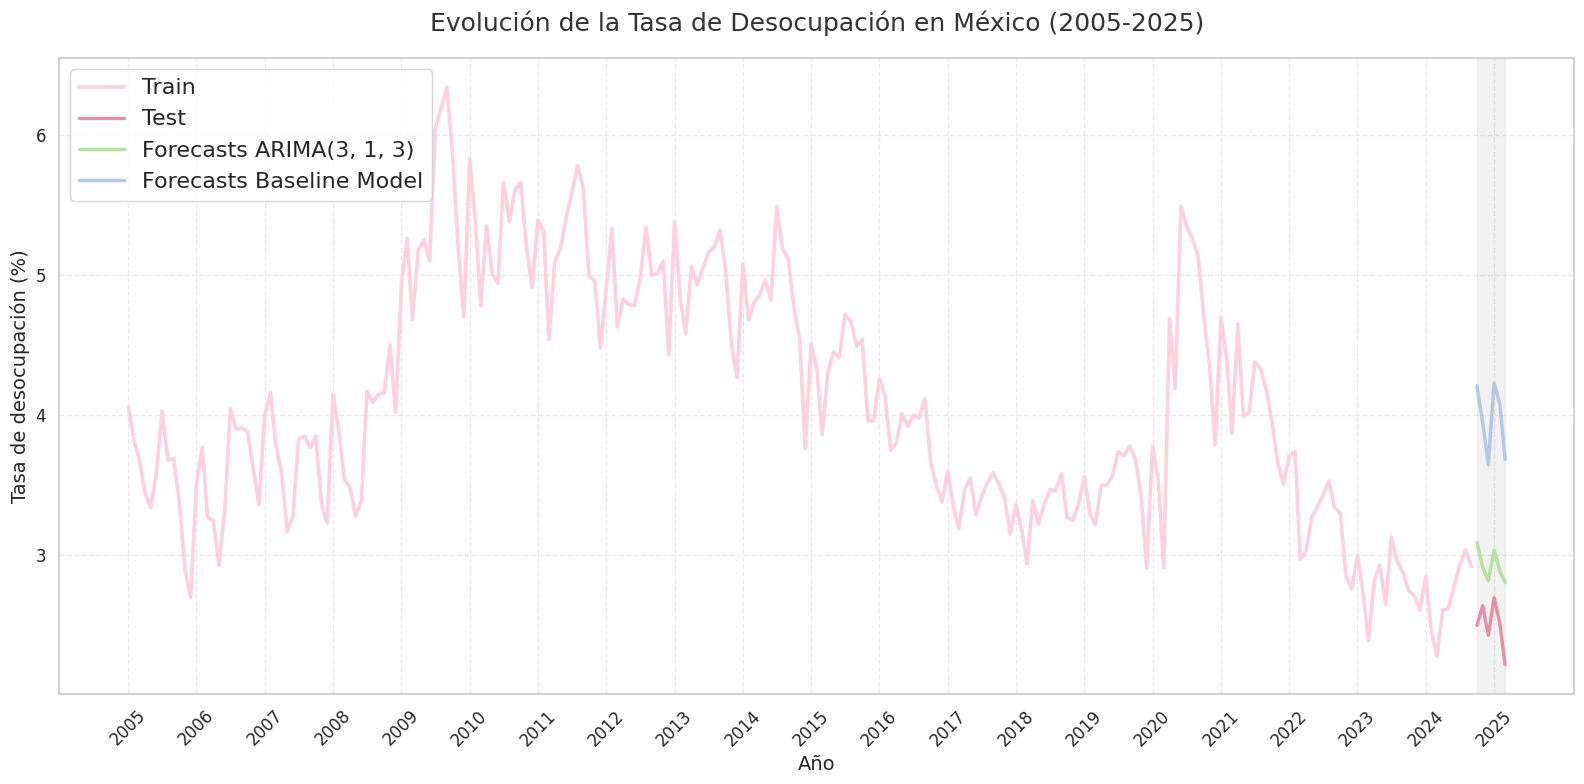

In [225]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(16, 8))

# Graficar train set, test set, y pronosticos del modelo arima y baseline
sns.lineplot(data = train, x='Periodo', y='Porcentaje', color='#ffd1df', linewidth=2.6, label='Train')
sns.lineplot(data = test, x='Periodo', y='Porcentaje', color='#e78ea5', linewidth=2.4, label='Test')
sns.lineplot(data = test, x='Periodo', y='forecasts_arima', color='#b7e1a1', linewidth=2.5, label='Forecasts ARIMA(3, 1, 3)')
sns.lineplot(data = test, x='Periodo', y='forecasts_baseline', color='#b7c9e2', linewidth=2.5, label='Forecasts Baseline Model')

# Añadir la barra que indica el test set (últimos 6 meses)
plt.axvspan(test['Periodo'].iloc[0],   # Fecha inicial del test set
            test['Periodo'].iloc[-1],  # Fecha final del test set
            color="#808080",
            alpha=0.1)

# Título y etiquetas de los ejes
plt.title('Evolución de la Tasa de Desocupación en México (2005-2025)',
          fontsize=18, pad=20, color='#333333')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Tasa de desocupación (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotación para mejor lectura
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Ajustamos el eje x para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique() # Extraer los años únicos y establecerlos como ticks
plt.xticks(ticks=pd.to_datetime([f'{year}-01-01' for year in years]), labels=years)

# Leyenda
plt.legend(
    frameon=True,
    fontsize=16
)
plt.tight_layout()
plt.show()

***Observaciones***
- Al comparar los pronósticos del modelo ARIMA(3, 1, 3) con los del modelo baseline, observamos que el ARIMA logra acercarse mucho más a los valores reales del test set.

- Esto indica que el modelo ARIMA(3, 1, 3) tiene un mejor desempeño en términos de precisión, por lo que podemos confiar más en sus pronósticos frente a los obtenidos con el baseline model.

#### **2. Pronosticos a Futuro**
- Una vez evaluada la capacidad predictiva del modelo ARIMA(3, 1, 3) con los elementos del test set, procederemos ahora a utilizarlo para pronosticar la tasa de desocupación a futuro.

- Específicamente, realizaremos predicciones para los próximos seis meses no observados en la serie, correspondientes a abril, mayo, junio, julio, agosto y septiembre de 2025.

- Además de proporcionar una estimación puntual para cada uno de estos meses, generaremos intervalos de confianza del 95%, lo que nos permitirá establecer un rango plausible dentro del cual puede encontrarse el valor real.

**1) Entrenar modelo final**
- Ahora entrenamos el modelo final utilizando toda la serie de tiempo disponible, sin dividirla en train y test set. Esto nos permite aprovechar al máximo la información histórica para generar pronósticos más robustos.

- Para ello, empleamos nuevamentela función SARIMAX() y ajustamos un modelo ARIMA() utilizando los mismos parámetros identificados previamente (p = 3, d = 1, q = 3).

In [257]:
# Entrenar modelo final con todos los datos
model_arima_final = SARIMAX(data_og["Porcentaje"], order=(3,1,3)).fit(maxiter=1000)

**2) Realizar pronósticos**

- Realizamos los pronósticos con la función get_forecast(), la cual es especialmente recomendada para estimar valores futuros no observados en la serie de tiempo. Al especificar steps=6, obtenemos las predicciones para los próximos seis meses.

- Además, esta función nos proporciona tanto los pronósticos puntuales como los intervalos de confianza al 95%, lo que nos permite evaluar la incertidumbre asociada a las predicciones.

In [258]:
# Pronosticar 6 meses adelante con intervalos del 95%
forecast_arima_final = model_arima_final.get_forecast(steps=6)

- Obtenemos las estimaciones puntuales para los seis meses pronosticados utilizando el atributo predicted_mean, el cual proporciona el valor central del pronóstico para cada periodo.

- Para calcular los intervalos de confianza del 95%, aplicamos la función conf_int() sobre el objeto de pronóstico. Esta función nos devuelve los límites inferior y superior que representan un rango plausible en el que podría encontrarse el valor real.

In [259]:
forecast_arima_mean = forecast_arima_final.predicted_mean # Punto central del pronóstico (pronóstico puntual)
forecast_arima_ci = forecast_arima_final.conf_int() # Límites inferior/superior

**3) Crear data frame con los resultados obtenidos**
- Generamos un DataFrame que contiene los resultados del pronóstico a futuro. Este incluye:

  - El periodo correspondiente a cada mes pronosticado.
  - El valor puntual estimado para cada mes.
  - Los límites inferior y superior del intervalo de confianza del 95% asociado.

In [263]:
# Crear rango de fechas para los próximos 6 meses a partir del último mes disponible en los datos originales
forecast_dates = pd.date_range(
    start = data_og["Periodo"].iloc[-1] + pd.DateOffset(months=1),  # Fecha posterior al último dato observado
    periods = 6,                                                    # Número de meses a pronosticar
    freq='MS'                                                       # Frecuencia mensual (inicio de mes)
)

# Crear DataFrame con los resultados del pronóstico
forecast_arima_df = pd.DataFrame({
    'Periodo': forecast_dates,                      # Fechas pronosticadas
    'Pronostico ARIMA(3, 1, 3)': forecast_arima_mean,              # Pronósticos puntuales
    'Limite Inferior': forecast_arima_ci.iloc[:, 0],# Límite inferior del intervalo de confianza
    'Limite Superior': forecast_arima_ci.iloc[:, 1] # Límite superior del intervalo de confianza
})

# Mostrar el dataframe con las predicciones
forecast_arima_df


,Periodo,"Pronostico ARIMA(3, 1, 3)",Limite Inferior,Limite Superior
243,2025-04-01,2.542597,1.902204,3.182991
244,2025-05-01,2.440753,1.636290,3.245217
245,2025-06-01,2.337889,1.440384,3.235395
246,2025-07-01,2.603489,1.635134,3.571843
247,2025-08-01,2.472028,1.444440,3.499615
248,2025-09-01,2.354265,1.276800,3.431729


***Observaciones***
- Los intervalos de confianza al 95% para cada uno de los meses pronosticados nos indican que, con un 95% de certeza, el valor real de la tasa de desocupación se encontrará dentro del rango delimitado por el límite inferior y el límite superior.

- De esta forma, tenemos no solo una estimación puntual (el pronóstico), sino también una medida de la incertidumbre asociada a cada predicción.

- Por ejemplo, para abril de 2025, se espera que la tasa de desocupación sea aproximadamente 2.54%, pero con un 95% de confianza se puede afirmar que estará entre 1.90% y 3.18%.

**4) Visualizar Pronósticos**
- Graficaremos los pronósticos a futuro generados por el modelo ARIMA(3, 1, 3), junto con la serie original.

- En la visualización se incluyen tanto los valores puntuales pronosticados como los intervalos de confianza del 95%, para observar no solo la trayectoria esperada de la tasa de desocupación, sino también la incertidumbre asociada a cada estimación.

- Esta gráfica nos ofrece una idea del comportamiento aproximado que podría seguir la tasa de desocupación durante los meses de abril a septiembre de 2025.

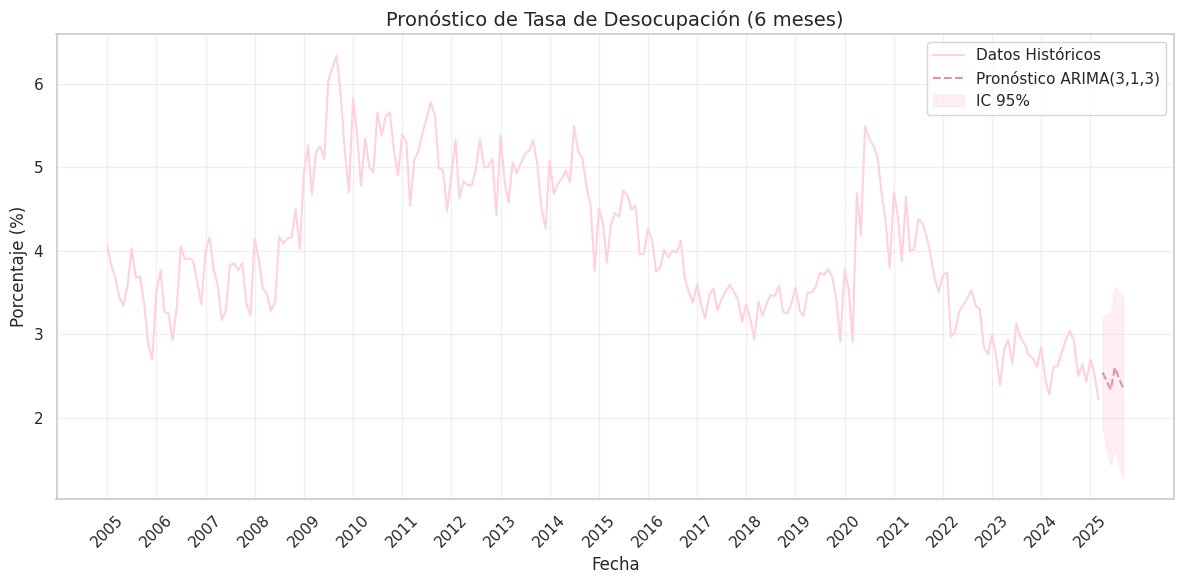

In [265]:
plt.figure(figsize=(12, 6))

# Datos históricos
sns.lineplot(data=data_og, x='Periodo', y='Porcentaje', color='#ffd1df', label='Datos Históricos')

# Pronósticos
sns.lineplot(data=forecast_arima_df, x='Periodo', y='Pronostico ARIMA(3, 1, 3)', color='#e78ea5', linestyle='--', label='Pronóstico ARIMA(3,1,3)')

# Intervalos de confianza
plt.fill_between(
    forecast_arima_df['Periodo'],
    forecast_arima_df['Limite Inferior'],
    forecast_arima_df['Limite Superior'],
    color='#ffb2d0',
    alpha=0.2,
    label='IC 95%'
)

# Personalización
plt.title('Pronóstico de Tasa de Desocupación (6 meses)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Ajustar ejes para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique()
plt.xticks(ticks=pd.to_datetime([f'{year}-01-01' for year in years]), labels=years)

# Leyenda
plt.legend()
plt.tight_layout()
plt.show()

Observaciones
- Podemos observar que los ponósticos obtenidos parecen seguir más o menos el mismo patrón que se observa al final de la serie de tiempo, aunque al ser pocos pronósticos e sun poco dificil de distinguir.
- Lo que podemos concluir es que para los meses de abril, mayo, junio, julio, agosto y septiempre de 2025, se espera que la tasa de desocupación aumente ligeramente, pero que comience a disminuir para estos ultimos meses.


para  interpretar los resultados en el contexto del indicador y el ODS!! debo jsutificar como aportan algo relevante en el mundo real!!!

## **6. Proceso Autorregresivo Integrado de Media Móvil Estacional: $SARIMA(p,d,q)(P,D,Q)_m$**
​


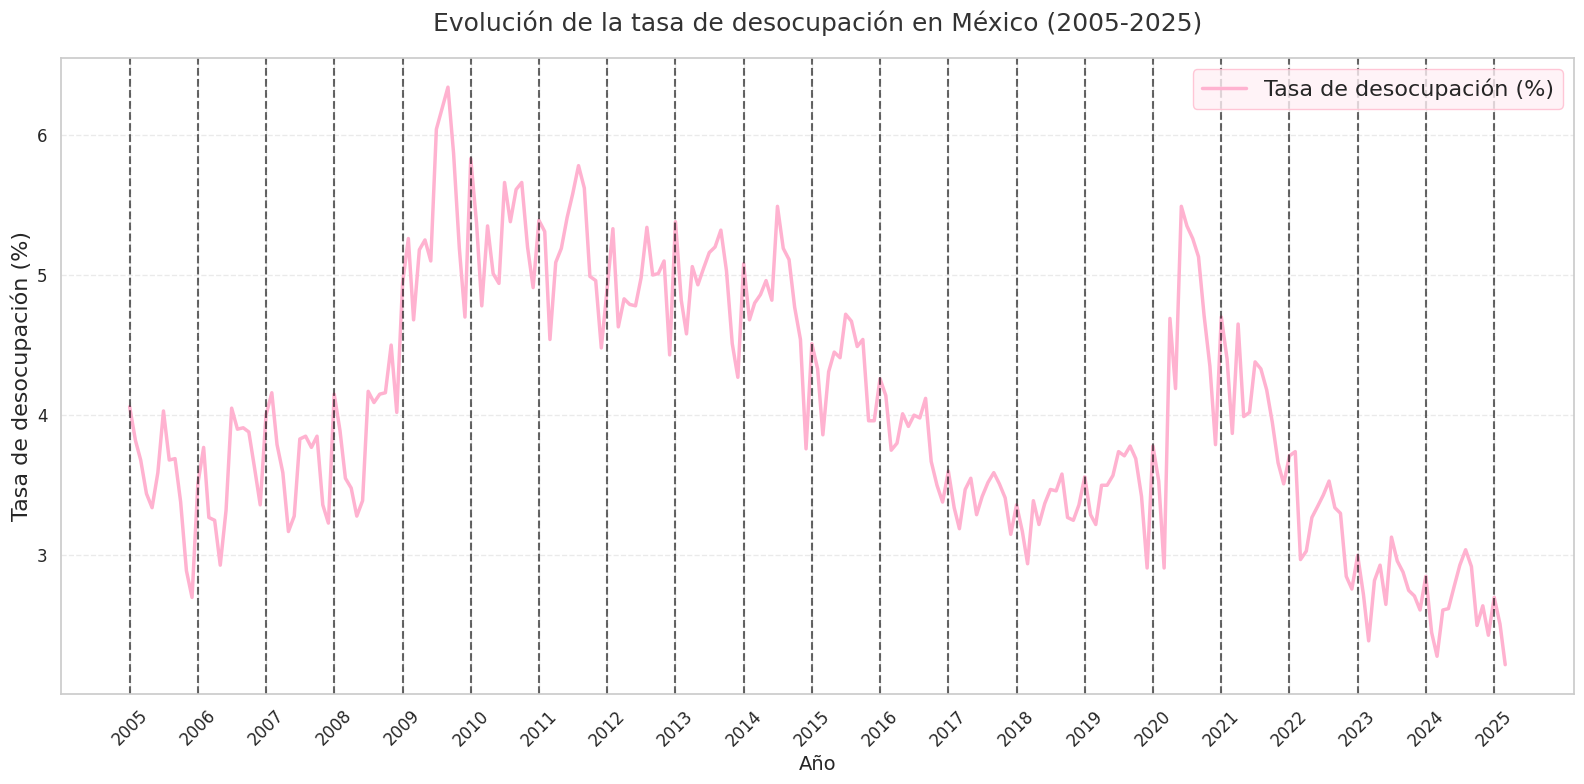

In [ ]:
sns.set(style = "whitegrid", palette = "pastel")
plt.figure(figsize = (16, 8))

# Graficamos la serie temporal principal
sns.lineplot(
    data = data_og,
    x = 'Periodo',
    y = 'Porcentaje',
    color = '#ffb2d0',
    linewidth = 2.5,
    label='Tasa de desocupación (%)'
)

# Añadir líneas verticales al inicio de cada año
for year in range(2005, 2026):
    plt.axvline(
        x = pd.to_datetime(f'{year}-01-01'),
        color ='black',
        linestyle ='--',
        linewidth = 1.5,
        alpha = 0.6
    )

# Personalización del gráfico
plt.title('Evolución de la tasa de desocupación en México (2005-2025)',
          fontsize = 18, pad = 20, color = '#333333')
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Tasa de desocupación (%)', fontsize = 16)

# Ajustar ticks del eje x
years = pd.to_datetime(data_og['Periodo']).dt.year.unique()
plt.xticks(
    ticks = pd.to_datetime([f'{year}-01-01' for year in years]),
    labels = years,
    rotation = 45,
    fontsize = 12
)

plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Leyenda
plt.legend(
    frameon = True,
    facecolor = '#FFF0F5',
    edgecolor = '#ffbacd',
    fontsize = 16
)

plt.tight_layout()
plt.show()

- Si recordamos, graficamos la serie de tiempo con lineas de referencia que indican el inicio de cada año, esto con el propósito de identificar si exixste un patrón estacional. Como nuestra serie de tiempo tiene una frecuencia mensual, esperamos tener un patrón que se repita año con año.
- Podemos ver un patrón en el cual la tasa de desocupación comienza alta al inicio de cada año, luego baja significativamente, comienza a subir, tiene un ligero descenso, vuelve a subir, luego baja, y finalmente vuelve a subir. Si nos fijamos en cada intervalo entre las lineas de referencia podemos ver que este mismo patrón se repite año con año. Hay años en los cuales el patrón es más marcado con otros, pero el mismo comportamiento se puede distingir año con año.
- Esto significa que identificamos una componente estacional en nuestra serie de tiempo.
- También podemos distinguir una tendencia en nuestra serie de tiempo, no vemos un comportamiento como el de una linea recta horizontal a lo largo del tiempo. Podemos ver que la serie sube, baja, vuelve a subir y vuelve a bajar, similar a un polinomio de grado 3 o grado 4.
- Como vimos, al observar una tendencia, esperábamos que nuestra serie no fuera estacionaria, cosa que confirmamos al realizar la prueba ADF.

Nuestra serie de tiempo presenta una estacionalidad determinada por una frecuencia mensual, '

- Trataremos un periodo de tiempo como un año. La frecuencia depernde de la recolección de los datos, al tener una frecuencia mensual, tenemos m = 12 ya qye tenemos 12 meses por año.
- Al identificar estacionalidad en nuestra serie de tiempo, esto nos lleva al proceso $SARIMA(p,d,q)(P,D,Q)_m$ básicamente está compuesto por dos procesos ARIMA:
  - una parte no estacionaria, con los órdenes $p, d$ y $q$ igual al proceso $ARIMA(p, d, q)$
  - otra parte estacional con los órdenes $P, D$ y $Q$, junto con la frecuencia de la estacionalidad dada por $m$.

- Este proceso es básicamente un proceso $ARIMA(p, d, q)$ pero donde nuestra serie tiene un fuerte componente estacional. Consiste en un proceso con una parte ARIMA noe stacionaria y una parte ARIMA estacional, el proceso $ARIMA(p, d, q)$ es equivalente al $SARIMA(p, d, q)(0, 0, 0)_m$.

- El proceso $SARIMA(p,d,q)(P,D,Q)_m$ está dado por:

La ecuación general del modelo SARIMA se expresa como:

$$
\Phi(B^m) \phi(B) \nabla^d \partial^D Y_t = \Theta(B^m) \theta(B) w_t
$$

Donde:

- Componente AR (autorregresivo):
  - No estacioario: $\phi(B) = 1 - \phi_1 B - \cdots - \phi_p B^p$
  - Estacional: $\Phi(B^m) = 1 - \Phi_1 B^m - \cdots - \Phi_P B^{mP}$

- Componente MA (media móvil):
  - No estacionario: $\theta(B) = 1 + \theta_1 B + \cdots + \theta_q B^q$
  - Estacional: $\Theta(B^m) = 1 + \Theta_1 B^m + \cdots + \Theta_Q B^{mQ}$

- Operadores de diferencias:
  - Orden de diferenciación no estaciocario: $\nabla^d = (1 - B)^d$
  - Orden de diferenciación estacional: $\partial^D = (1 - B^m)^D$


- Aplicamos este proceso ya que una estación puede depender de estaciones pasadas!

- Anteriormente descompusimos nuestra serie de tiempo en sus componentes para identificar la estacionalidad.

- Usamos la función STL() de statsmodels.tsa.seasonal con una frecuencia m = 12 (period = 12), ya que contamos con datos mensuales.



Identificar estacionariedad
- Vimos que nuestra serie sigue una tendencia y por lo tanto probablemente no era estacionaria. Aplicando la prueba ADF verificamos que este supuesto era cierto. Despues aplicamos una diferenciación de primer orden, y vimoes que con esto era suficiente para conseguir una serie estacionaria, lo cual fijó nuestro parámetro d en 1, d = 1.

**1) Generar Training y Test Set**
- Generaremos nuevamente pronósticos para los próximos 6 meses y comenzaremos pronosticando nuestro test set para evaluar el modelo.
- Nuestra serie contiene observaciones hasta marzo de 2025. A partir de esta información, generaremos pronósticos para estimar el porcentaje de desocupación durante los siguientes seis meses: abril, mayo, junio, julio, agosto y septiembre de 2025.

- Para ello, dividimos los datos en conjunto de entrenamiento y prueba de la siguiente manera:

  - **Training set:** Incluye todas las observaciones, excepto las correspondientes a los últimos seis meses disponibles.

  - **Test set:** Contiene únicamente los datos de los últimos seis meses observados.

In [ ]:
train = data_og[: -6].copy() # Training set, contiene todas las observaciones a excepcion de los ultimos 6 meses
test = data_og[-6 :].copy() # Test set, contiene datos de lo ultimos 6 meses

### **1. Metodología Box-Jenkins**

- Aplicaremos la metodología Box-Jenkins para identificar el modelo más adecuado de la forma $ARIMA(p, d, q)$ para nuestra serie de tiempo.

#### **1. Identificación**

- En esta etapa evaluamos si la serie es estacionaria y detectamos la posible presencia de estacionalidad.

**Estacionariedad:**

 Vimos que nuestra serie sigue una tendencia y por lo tanto probablemente no era estacionaria. Aplicando la prueba ADF verificamos que este supuesto era cierto. Despues aplicamos una diferenciación de primer orden, y vimoes que con esto era suficiente para conseguir una serie estacionaria, lo cual fijó nuestro parámetro d en 1, d = 1 de la parte no estacionaria.

**Estacionalidad:**
- Identificamos además estacionalidad en nuestra serie de tiempo con una frecuencia de 12 meses, m = 12.


#### **2. Enlistar valores de p, q, P y Q ajustar modelos  $SARIMA(p, d, q)(P, D, Q)_m$ para cada posible combinación.**

**1) Función para ajustar distintos modelos**


In [ ]:
from itertools import product

def optimize_sarima(data, p, d, q, P, D, Q, m, maxiter=2000):
    '''
    Ajusta de forma iterativa modelos SARIMA(p, d, q)(P, D, Q)[m] sobre una serie de tiempo
    y devuelve los valores del criterio AIC para cada combinación de parámetros.

    Entrada:
    - data: Serie de tiempo a modelar.
    - p: Valores a probar para el parámetro AR no estacional.
    - d: Orden de diferenciación no estacional.
    - q: Valores a probar para el parámetro MA no estacional.
    - P: Valores a probar para el parámetro AR estacional..
    - D: Orden de diferenciación estacional.
    - Q: Valores a probar para el parámetro MA estacional.
    - m: Periodo estacional.
    - maxiter: Número máximo de iteraciones para la convergencia.

    Salida:
    - results: DataFrame con todas las combinaciones probadas y sus AIC correspondientes,
               ordenadas por AIC ascendente.
    '''

    # Generamos todas las combinaciones posibles de parámetros
    orders = np.array(list(product(p, q, P, Q)))

    # Creamos una lista vacía para guardar los resultados de los modelos.
    results = []

    for i in range(len(orders)):
        order_tuple = (orders[i, 0], d, orders[i, 1])  # tupla de órdenes de la parte no estacionaria (p, d, q)
        seasonal_tuple = (orders[i, 2], D, orders[i, 3], m)  # tupla de órdenes de la parte estacional (P, D, Q, m)

        try:
            # Ajustamos el modelo SARIMAX
            model = SARIMAX(data,
                           order=order_tuple,
                           seasonal_order=seasonal_tuple).fit(maxiter=maxiter,
                                                              disp=False)

            # Solo consideramos modelos que convergieron
            if model.mle_retvals['converged']:
                aic = model.aic
                results.append((order_tuple, seasonal_tuple, aic))

        except:
            continue

    # Convertimos a DataFrame y ordenamos por AIC
    results_df = pd.DataFrame(results, columns=["Order (p,d,q)", "Seasonal Order (P,D,Q,m)", "AIC"])
    results = results_df.sort_values(by="AIC")

    return results

**1) Definir Parámetros**

- Establecemos los valores que probaremos para los parámetros $p$, $q$, $P$, y $Q$, del modelo $ARIMA(p, d, q)$.
- Elegimos valores entre 0 y 4 lo que permite considerar una amplia gama de estructuras
- El parámetro $d$ se fija en 1, ya que previamente identificamos que una sola diferenciación es suficiente para lograr la estacionariedad de la serie.

- Definimos el orden de la diferencia de ambas partes, así como la frecuencia de la componente estacional.
- Como vimos fijamos el parámetro de diferencición de la parte no estacionaria en 1, d = 1. Y contamos con una frecuencia mensual enn nuestros datos por lo que m = 12.
- El parámetro D sería 1 si nuestra serie hubiera necesitado una diferenciación de m, es decir, si hubiera una dependencia entre a estacionariedad y su estación. Como en este caso fue suficiente con una sola diferenciación, el parámetro D permanece en 0


In [ ]:
# Definir rangos de parámetros a probar
p = range(0, 3, 1)  # AR no estacional
d = 1               # Diferenciación no estacional
q = range(0, 3, 1)  # MA no estacional
P = range(0, 3, 1)  # AR estacional
D = 0               # Diferenciación estacional
Q = range(0, 4, 1)  # MA estacional
m = 12               # Estacionalidad anual

- Al ahora trabajar con más parámetros las combinaciones a probar de multiplican!, para hacer el proceso más eficiente, en vez de generar una malla con todos los pares ordenados como lo hicimos en el podemo ARIMA, utilizaremos iteradores. Usamos la función product() del módulo itertools para crear un arreglo con todas las posibles combinaciones de $p$, $q$, $P$, $Q$.
- Sin embargo, esto no nos devolverá una lista con todas las posibles combinaciones, unicamente devuelve la combinación en la que iteró. Para que nos devuelva todas, haremos una lista de lo que devolverá product

- Realizamos un ciclo for para ajustar todos los modelos, considerando las sentencias try y except por si alguna combinación no funciona y uno de los modelos presenta un problema, de forma que no se detenga ahi y siga probando con las demás combinaciones

In [116]:
# Ejecutar optimización
resultados_sarima = optimize_sarima(train['Porcentaje'], p, d, q, P, D, Q, m)
resultados_sarima.head()

,"Order (p,d,q)","Seasonal Order (P,D,Q,m)",AIC
101,"(2, 1, 2)","(1, 0, 1, 12)",63.586376
89,"(2, 1, 1)","(1, 0, 1, 12)",64.626077
41,"(1, 1, 0)","(1, 0, 1, 12)",64.692480
29,"(0, 1, 2)","(1, 0, 1, 12)",64.858123
77,"(2, 1, 0)","(1, 0, 1, 12)",65.341442


#### **3. Seleccionar el mejor modelo**
- Según los resultados obtenidos, el modelo con el menor valor de AIC y, por tanto, el más adecuado, es un $SARIMA(2, 1, 2)(1, 0, 1)_{12}$.

**1) Ajustamos un modelo $SARIMA(2, 1, 2)(1, 0, 1)_{12}$**

In [117]:
# Ajustamos el modelo que resulto ser el mejor
model_sarima = SARIMAX(train['Porcentaje'], order = (2, 1, 2), seasonal_order = (1, 0, 1, 12)).fit(maxiter = 2000)

# Hacemos un summary para ver los parametros d enuestro modelo
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Porcentaje   No. Observations:                  237
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 -24.793
Date:                              Sat, 07 Jun 2025   AIC                             63.586
Time:                                      19:52:30   BIC                             87.833
Sample:                                           0   HQIC                            73.360
                                              - 237                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6849      0.289     -2.366      0.018      -1.252      -0.118
ar.L2         -0.5277      0.148     -3.570      0.000      -0.817      -0.238
ma.L1          0.3240      0.286      1.134      0.257      -0.236       0.884
ma.L2          0.4281      0.143      2.998      0.003       0.148       0.708
ar.S.L12       0.9714      0.015     63.438      0.000       0.941       1.001
ma.S.L12      -0.7296      0.059    -12.369      0.000      -0.845      -0.614
sigma2         0.0680      0.005     14.023      0.000       0.058       0.077
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               123.01
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.75
Prob(H) (two-sided):                  0.72   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$
\begin{aligned}
\Phi(B^m) \phi(B) \nabla^d \partial^D Y_t &= \Theta(B^m) \theta(B) w_t \\
(1 - \Phi_1 B^{12})(1 - \phi_1 B - \phi_2 B^2)(1 - B) Y_t &= (1 + \Theta_1 B^{12})(1 + \theta_1 B + \theta_2 B^2) w_t \\
(1 - 0.9714B^{12})(1 + 0.6849B + 0.5277B^2)(1 - B)Y_t &= (1 - 0.7296B^{12})(1 + 0.3240B + 0.4281B^2)w_t
\end{aligned}
$$

donde:
 - $w_t$ ~ $WN(0, 0.0680)$

#### **4. Evaluación del Modelo: Análisis de Residuos**

- Hacemos un análisis de residuos para verificar que sean independientes y poder realizar pronósticos!
- Los residuos están dados por lo siguiente:
$$
residuo_t = y_t - \hat{y}_t
          = w_t
$$

- Es decir, son puro ruido blanco!!
- Sabemos que el ruido blanco sigue la siguente distribución: $w_t$ ~ $WN(0, \sigma^2)$
- Esto es, el ruido blanco cumple con las siguientes tres caracetristicas:
  1. Que sean independientes
  2. Que tengan media 0
  3. Que tengan una varianza constante

Por lo tanto, debemos verificar que los residuos de nuestro modelo cumplan estros tres criterios. Para eso haremos dos diagnósticos: un diagnóstico visual donde hacemos distintas gráficas de los residuos y realizando una prueba estadística formal que es la prueba de Ljung Box.

- Obtenemos los residuos del modelo con el atributo 'resid'

In [118]:
residuals_sarima = model_sarima.resid

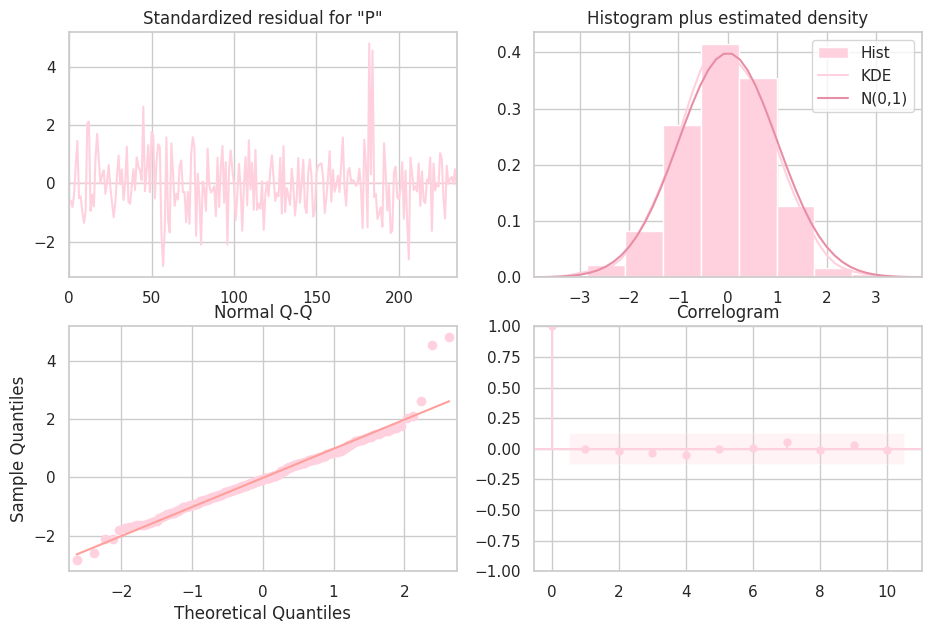

In [247]:
# Activamos un estilo rosado general
sns.set_style("whitegrid")
plt.rcParams.update({"axes.prop_cycle": plt.cycler(color=["#ffd1df", "#ffd1df", "#e78ea5", "#ffd1df"])})

# Luego generas las gráficas
model_sarima.plot_diagnostics(figsize=(11, 7))
plt.show()


In [120]:
ljungbox_res_sarima = acorr_ljungbox(residuals_sarima, np.arange(1, 11, 1))

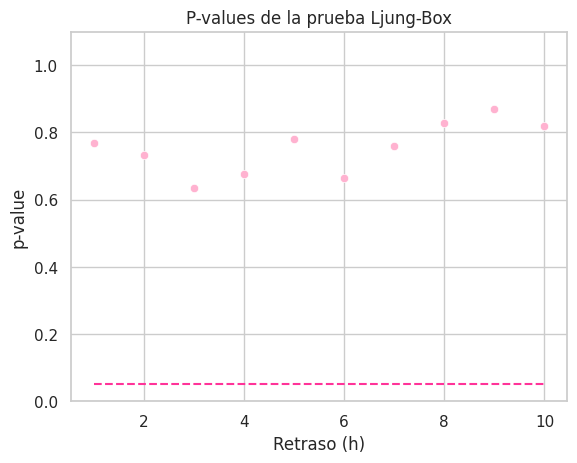

In [121]:
sns.scatterplot(x = np.arange(1, 11, 1), y = ljungbox_res_sarima["lb_pvalue"], color = "#ffd1df")
plt.hlines(y = 0.05, xmin = 1, xmax = 10, color = "#e78ea5", linestyles = "--")
plt.ylim(0, 1.1)
plt.xlabel("Retraso (h)")
plt.ylabel("p-value")
plt.title("P-values de la prueba Ljung-Box")
plt.show();

### **2. Realizar Pronósticos**

- Como ya tenemos evidencia de que los residuos del modelo son ruido blanco, nuestro modelo ARIMA(3,1, 3) está listo para realizar predicciones!

- Importante notar aqui que dado que el modelo ARIMA considera la diferenciación y utiliza los datos originales para ajustar el modelo, no será necesario hacer unreescalamiento de los pronosticos!

**1) Pronosticar elementos del test set**

In [122]:
# Revisamos los elementos del test set para definir los índices de los meses a predecir
test

,Periodo,Porcentaje
237,2024-10-01,2.50
238,2024-11-01,2.64
239,2024-12-01,2.43
240,2025-01-01,2.70
241,2025-02-01,2.51
242,2025-03-01,2.22


In [123]:
# Utilizamos función .preditc() y especificamos los indices de los meses a predecir
forecasts_sarima = model_sarima.predict(237, 242)

**2) Visualizar Datos Reales vs Pronósticos**

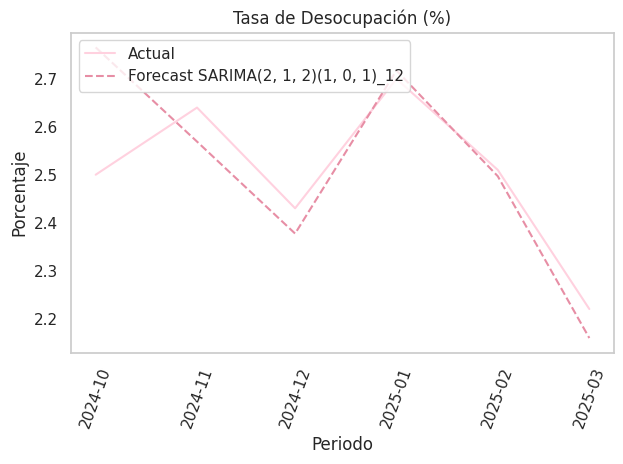

In [248]:
#ahora vamos a graficar las predcciones junto con los datos originales
#tenemos aqui forecasts
sns.lineplot(data = test, x = "Periodo", y = "Porcentaje", color = "#ffd1df", label = "Actual")
sns.lineplot(x = test["Periodo"], y = forecasts_sarima, color = "#e78ea5", linestyle = "--", label = "Forecast SARIMA(2, 1, 2)(1, 0, 1)_12")
plt.grid()
plt.xlabel("Periodo")
plt.ylabel("Porcentaje")
plt.title("Tasa de Desocupación (%)")
plt.xticks(rotation = 70)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show();

**3) Calcular MAPE**

In [125]:
# Construimos el mape
mape_sarima= np.abs((test["Porcentaje"] - forecasts_sarima)/test["Porcentaje"]).mean()*100
mape_sarima

np.float64(3.2290451390220984)

**4) Pronósticos a Futuro**

In [126]:
# Entrenar modelo final con todos los datos
model_sarima_final = SARIMAX(data_og["Porcentaje"], order = (2, 1, 2), seasonal_order = (1, 0, 1, 12)).fit(maxiter = 2000)

In [127]:
# Pronosticar 6 meses adelante con intervalos del 95%
forecast_sarima_final = model_sarima_final.get_forecast(steps=6)

In [128]:
forecast_sarima_mean = forecast_sarima_final.predicted_mean # Punto central del pronóstico
forecast_sarima_ci = forecast_sarima_final.conf_int() # Límites inferior/superior

In [129]:
# Crear dataframe con resultados
forecast_sarima_df = pd.DataFrame({
    'Periodo': forecast_dates,
    'Pronostico': forecast_sarima_mean,
    'Limite Inferior': forecast_sarima_ci.iloc[:, 0],
    'Limite Superior': forecast_sarima_ci.iloc[:, 1]
})

forecast_sarima_df

,Periodo,Pronostico,Limite Inferior,Limite Superior
243,2025-04-01,2.581479,2.074254,3.088703
244,2025-05-01,2.580192,1.979286,3.181097
245,2025-06-01,2.669029,1.950169,3.387890
246,2025-07-01,2.842435,1.998744,3.686126
247,2025-08-01,2.855294,1.933867,3.776722
248,2025-09-01,2.772505,1.769814,3.775197


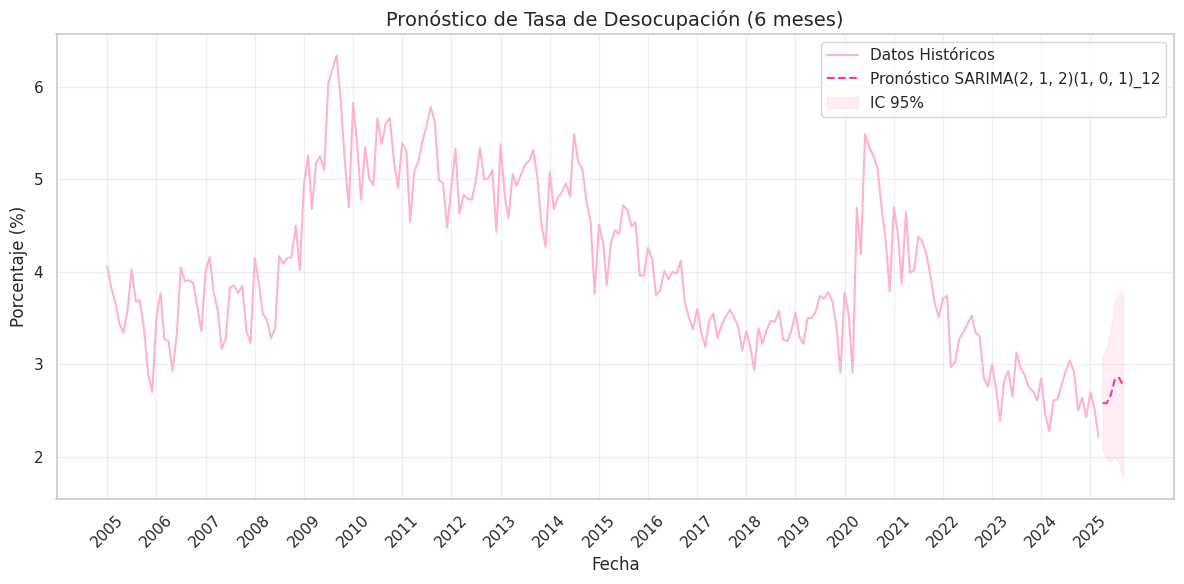

In [130]:
plt.figure(figsize=(12, 6))

# Datos históricos
sns.lineplot(data=data_og, x='Periodo', y='Porcentaje', color='#ffd1df', label='Datos Históricos')

# Pronósticos
sns.lineplot(data = forecast_sarima_df, x='Periodo', y='Pronostico', color='#e78ea5', linestyle='--',label='Pronóstico SARIMA(2, 1, 2)(1, 0, 1)_12')

# Intervalos de confianza
plt.fill_between(
    forecast_sarima_df['Periodo'],
    forecast_sarima_df['Limite Inferior'],
    forecast_sarima_df['Limite Superior'],
    color='#ffb2d0',
    alpha=0.2,
    label='IC 95%'
)

# Personalización
plt.title('Pronóstico de Tasa de Desocupación (6 meses)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Ajustar ejes para mostrar todos los años
years = pd.to_datetime(data_og['Periodo']).dt.year.unique()
plt.xticks(ticks=pd.to_datetime([f'{year}-01-01' for year in years]), labels=years)

# Leyenda
plt.legend()
plt.tight_layout()
plt.show()

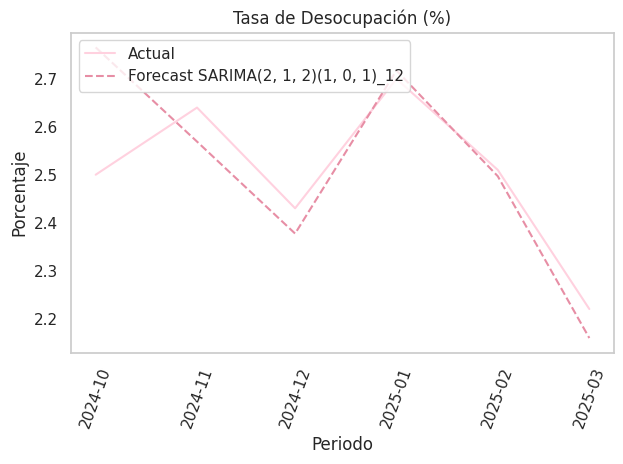

In [249]:
#ahora vamos a graficar las predcciones junto con los datos originales
#tenemos aqui forecasts
sns.lineplot(data = test, x = "Periodo", y = "Porcentaje", color = "#ffd1df", label = "Actual")
sns.lineplot(x = test["Periodo"], y = forecasts_sarima, color = "#e78ea5", linestyle = "--", label = "Forecast SARIMA(2, 1, 2)(1, 0, 1)_12")
plt.grid()
plt.xlabel("Periodo")
plt.ylabel("Porcentaje")
plt.title("Tasa de Desocupación (%)")
plt.xticks(rotation = 70)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show();